# Data Parsing Class

In [1]:
import pandas as pd
import itertools
import numpy as np
import copy,re
import shap

class dataParsing:
    
    def __init__(self):
        self.X = pd.DataFrame()
        self.Y = pd.DataFrame()
        self.data = pd.DataFrame()
        self.labels = False
        self.targets = ['Unaided_Branding', 'Brand_Cues__Mean','Aided_Branding__Mean',
           'Active_Involvement__Mean','New_Information__Mean', 'Enjoyment__Mean',
           'Brand_Appeal__Mean', 'Understanding__Mean','Relevance_of_Information__Mean',
           'Credibility_of_Information__Mean',
           'Brand_Difference__Mean']
        
    def separate_X_Y(self):
        for tr in self.targets:
            for col in self.data.columns:
                if tr in col:
                    self.Y[tr] = self.data[col]
                else:
                    self.X[col] = self.data[col]

        return self.X,self.Y
            
    
    def load_data(self,path_to_file = None,sheet_name="Data",labels=True):
        
        if path_to_file:
            self.data = pd.read_excel(path_to_file,sheet_name=sheet_name)
            X,Y = self.separate_X_Y()
            return X,Y
        else:
            print("Please provide path to file\n")
            return None
            
    def load_Y(self,path_to_file=None,video_name=False,column_name="Video Name"):
        self.Y = pd.DataFrame()
        if path_to_file:
            Y_data = pd.read_excel(path_to_file,sheet_name=0)
            for tr in self.targets:
                for col in Y_data.columns:
                    if re.sub("[^a-zA-Z]", "",tr) in re.sub("[^a-zA-Z]", "",col):
                        self.Y[tr] = Y_data[col]
            if video_name:
                self.Y["Video_name"] = Y_data[column_name]
        else:
            print("Please provide path to file\n")

        return copy.deepcopy(self.Y)
                        
    def isLabels(self):
        if self.Y.shape[0]!=0 :
            return True
        return False
    

# Feature Engineering Class

In [2]:
class featureEngineering(dataParsing):
    
    def __init__(self,related_brand="microsoft"):
        super().__init__()
        self.feature_columns = ['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', ' Female_frame_count',
       ' Male_frame_count', ' Female_dur', ' Male_dur',
       'Age: 0-15_frame_count', 'Age: 0-5_frame_count',
       'Age: 15-24_frame_count', 'Age: 25-34_frame_count',
       'Age: 35-44_frame_count', 'Age: 45-60_frame_count',
       'Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'African_frame_count',
       'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_dur', 'Caucasian_dur',
       'Eastasian_dur', 'Latino_dur', 'microsoft', 'microsoft_dur',
       'microsoft_first_ocr', 'microsoft_last_ocr', 'microsoft_total_ocr',
       'Intel_dur', 'Intel_first_ocr', 'Intel_last_ocr',
       'Intel_total_ocr', 'ASUS T102', 'Dell PCs', 'Dell XPS',
       'Dell XPS 13', 'HP Spectre x360', 'HP Spectre x360, Windows',
       'Lenovo PCs', 'Lenovo Yoga 720', 'Lenovo Yoga 910', 'MacBook Air',
       'MacBook Pro', 'Macbook Air', 'Microsoft Surface', 'Suface Laptop',
       'Surface Book', 'Surface Go', 'Surface Laptop', 'Surface Pen',
       'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       'Surface Pro 4, MacBook Air13, MacBook Air',
       'Surface Pro 4, Surface Book', 'Surface Pro 4, Windows 10',
       'Surface Pro 6', 'Surface laptop', 'Surface pro 4',
       'The new Surface Pro', 'The surface Laptop', 'Windows',
       'Windows 10', 'Windows 10 PC', 'Windows 10 PCs',
       'Windows 10, HP_Spectre', 'Windows 10, Windows', 'Yoga',
       'ASUS T102_dur', 'Dell PCs_dur', 'Dell XPS_dur', 'Dell XPS 13_dur',
       'HP Spectre x360_dur', 'HP Spectre x360, Windows_dur',
       'Lenovo PCs_dur', 'Lenovo Yoga 720_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Suface Laptop_dur', 'Surface Book_dur',
       'Surface Go_dur', 'Surface Laptop_dur', 'Surface Pen_dur',
       'Surface Pro_dur', 'Surface Pro 4_dur',
       'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface Pro 6_dur', 'Surface laptop_dur', 'Surface pro 4_dur',
       'The new Surface Pro_dur', 'The surface Laptop_dur', 'Windows_dur',
       'Windows 10_dur', 'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Lenovo Yoga 720_first_ocr', 'Lenovo Yoga 720_last_ocr',
       'Lenovo Yoga 720_total_ocr', 'Dell PCs_first_ocr',
       'Dell PCs_last_ocr', 'Dell PCs_total_ocr',
       'Surface Laptop_first_ocr', 'Surface Laptop_last_ocr',
       'Surface Laptop_total_ocr', 'The new Surface Pro_first_ocr',
       'The new Surface Pro_last_ocr', 'The new Surface Pro_total_ocr',
       'Surface Pro_first_ocr', 'Surface Pro_last_ocr',
       'Surface Pro_total_ocr', 'Suface Laptop_first_ocr',
       'Suface Laptop_last_ocr', 'Suface Laptop_total_ocr',
       'Surface laptop_first_ocr', 'Surface laptop_last_ocr',
       'Surface laptop_total_ocr', 'The surface Laptop_first_ocr',
       'The surface Laptop_last_ocr', 'The surface Laptop_total_ocr',
       'Surface Go_first_ocr', 'Surface Go_last_ocr',
       'Surface Go_total_ocr', 'Surface Pro 6_first_ocr',
       'Surface Pro 6_last_ocr', 'Surface Pro 6_total_ocr',
       'Dell XPS_first_ocr', 'Dell XPS_last_ocr', 'Dell XPS_total_ocr',
       'Lenovo PCs_first_ocr', 'Lenovo PCs_last_ocr',
       'Lenovo PCs_total_ocr']
        self.target_columns = self.targets
        
        self.brands_columns=["Intel","Apple","Asus","Hp","Dell"]
        self.related_brand = related_brand
    
        
    def addUnrelatedBrands(self,X,brands_columns=None):
        if isinstance(brands_columns,list) == False:
            brands_columns = self.brands_columns
        for param in ['_dur','_first_ocr','_last_ocr','_total_ocr']:
            unrelated_columns = [col+param for col in brands_columns]
            X['Unrelated'+param] = X[X.loc[:,unrelated_columns].columns].sum(axis=1)
            X = X.drop(unrelated_columns,axis=1)
        
        return X
    
    def nullPer(self,df):
        """Quantifies missing values"""
#         try:        
        return(df.isnull().mean()*100)
#         except:
#             pass
    
    def renameRelatedBrand(self,X,brand_name=None):
        if isinstance(brand_name,str) == False:
            brand_name = self.related_brand
        columns = [brand_name+col for col in ['','_dur','_first_ocr','_last_ocr','_total_ocr']]
        X.rename(columns=dict(zip(columns, ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
            'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)
        return X
    
    def addNewFeature(self,X,columns=None,_type='per',new_column_name=None,):
        if isinstance(columns,list):
            if _type =='sum':
                X[column_name] = X[X.loc[:,_columns].columns].sum(axis=1)
            else:
                for feature in columns:
                    index_1,index_2 = feature[0].rfind("_frame_count"),feature[1].rfind("_frame_count")
                    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
                    try:
                        X.insert(len(X.columns)-12,split_1+"_"+split_2+"_frame_count",X[feature[1]]/X[feature[0]])
                    except:
                        X[split_1+"_"+split_2+"_frame_count"] = X[feature[1]]/X[feature[0]]
        else:
            print("Please provide columns names and new column name")
        return X
    
    def clean_data(self,X,Y):
        Y =  Y.dropna(how='all') 
        return X.loc[:,self.feature_columns],Y
    
#     def correlation_matrix(self,X):
#         self.utils.plotCorr(X)
        
    def impute_Median_col(self,df, x):
        """Imputes median - treatement for missing values in Pandas series"""
        try:
            df[x].fillna(df[x].median(), inplace = True)
            return df[x]
        except:
            return df[x]
            pass

                  

# Data Preprocessing Class

In [3]:
from imblearn.over_sampling import SMOTE
import numpy as np

class DataPreprocessing(featureEngineering):
    
    def __init__(self):
        super().__init__()
        
    def checkNull(self,df):
        return self.nullPer(df).sort_values(ascending=False)
    
    def removeNULLColumns(self,df,percentage=0.7):
        return df.loc[:, self.nullPer(df)< percentage*100]
    
    def replace(self,df,replace_this,replace_with):
        return df.replace(replace_this,replace_with)
    
    def imputeMedian(self,df,columns=None):
        if isinstance(columns,list)==False:
            columns = ["Related_Brand"+col for col in ['_frame_count','_dur','_first_ocr','_last_ocr','_total_ocr']]
        
        for col in columns:
            df[col] = self.impute_Median_col(df,col)
        return df
    
    def imputeConstant(self,df,columns=None,constant=0):
        if isinstance(columns,list) == False:
            return df.fillna(constant)
        return df[columns].fillna(constant)
    
    def normalize(self,df,axis):
        return normalize(df,axis=1)
    
    def overSampling(self,xDF,yDF,col_as_label = 'length_of_ad_15',each_Col = False,rmCols = ['Video Name','length_of_ad_15'],size=400,random_state=None):
        sm = SMOTE(sampling_strategy = {0:size//2,1:size//2},random_state=random_state)
        labels = xDF.loc[:,col_as_label]
        if each_Col == False:
            temp_inp_df = pd.concat([xDF,yDF],1).drop(rmCols,1)
        else:
            temp_inp_df = pd.concat([xDF,yDF],1)
        X_res, y_res = sm.fit_resample(temp_inp_df,labels)
        
        resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
        resamp_target_df = pd.DataFrame(y_res,columns=['length_of_ad_15'])
        resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
        resamp_data_df['Video Name'] = self.data['Video Name']
        resamp_inputs_df = resamp_data_df[xDF.columns]
        resamp_target_df = resamp_data_df[yDF.columns]
        
        return resamp_inputs_df,resamp_target_df

# Modeling Class

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
import copy
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV,cross_validate,learning_curve,validation_curve
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Evaluation Class

In [5]:
class Evaluate:
    
    def __init__(self,models,model_type = 'ranf'):
        self.models_eval =[]
        self.model_type = model_type
        
    def evaluate(self,X_test,y_test,metrics='r2_score'):
        
        try:
            X = X_test.drop('Video Name',1)
        except:
            X = X_test
        for i in range(y_test.shape[1]):
            print(y_test.columns[i])
            preds = self.models_eval[i].predict(X)
            if metrics == 'r2_score':
                r2score = r2_score(y_test.iloc[:,i],preds)
                print("R2_SCORE %f" % r2score,"\n")
            elif metrics == 'rmse':
                rmse = math.sqrt(mean_squared_error(preds,y_test.iloc[:,i]))
                print("RMSE %f" % rmse,"\n")
                
    def plot_feature_importance(self,models,figsize,output_columns,feature_columns,savefig=False):
        self.models_eval = models
        try: 
            feature_columns = feature_columns.remove('Video Name')
        except:
            pass
        
        if self.model_type == 'ranf' or self.model_type == 'DT':
            for i in range(len(output_columns)):
                print(output_columns[i])
                importances = self.models_eval[i].feature_importances_
                if self.model_type == 'ranf':
                    std = np.std([tree.feature_importances_ for tree in self.models_eval[i].estimators_],
                                 axis=0)
                indices = np.argsort(importances)[::-1]

                # Print the feature ranking
                print("Feature ranking:")

                for f in range(len(feature_columns)):
                    print("%d. %s (%f)" % (f + 1, feature_columns[indices[f]], importances[indices[f]]))
                    

                # Plot the feature importances of the forest
                
                plt.title(output_columns[i])
                plt.barh(range(len(indices[0:8])), importances[indices[0:8]], color='b', align='center')
                plt.yticks(range(len(indices[0:8])), [feature_columns[i] for i in indices[0:8]])
                plt.xlabel('Relative Importance')
#                 plt.title("Feature importances")
                if savefig:
                    plt.savefig(feature_columns[i]+'_'+ self.model_type+'.png')
                plt.show()
                
        else:
            for i in range(len(output_columns)):
                xgb.plot_importance(self.models_eval[i],max_num_features = 8,xlabel='Gain',title =output_columns[i]+ ' Importance plot')
#             xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Cross Validation R2:' + str(round(np.max(scores),3)) )
            
                plt.rcParams['figure.figsize'] = [30,15]
                plt.rcParams['figure.dpi'] = 100
                matplotlib.rcParams.update({'font.size': 22})
                if savefig:
                    plt.savefig(feature_columns[i]+'_XGB_Plot.png')
                plt.show()
        
        

# Model Class

In [6]:
class Model(Evaluate):
    
    # model={"ranf","xgb","DT"}
    def __init__(self,model='ranf'):
        super().__init__(self,model)
        self.preprocessing = DataPreprocessing()
        self.model_type = model
        self.parameters =[]
        self.all_models=[]
        self.output_length= None
        self.output_columns = None
        
        
        if self.model_type == 'ranf':
            self.model = RandomForestRegressor(warm_start=True,verbose=1,random_state=123)
            Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
            Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
            Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
            New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
            Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
            Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
            Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}
        
        elif self.model_type == 'xgb':
            self.model = xgb.XGBRegressor(eta=0.3,save_period=1,random_state=123)
            #### RMSE was decreasing with increaasing n_estimators
            Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 2000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Active_Involvement__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 900,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
            Enjoyment__Mean_params= {'colsample_bytree': 0.8, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Relevance_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Credibility_of_Information__Mean_params = {'colsample_bytree': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}

        elif self.model_type == 'DT':
            self.model = DecisionTreeRegressor(random_state=123)
            Unaided_Branding_params = {'splitter':'best','max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Brand_mean_cues_params = {'splitter':'best','max_depth':20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Aided_Branding__Mean_params ={'splitter':'best','max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Active_Involvement__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            New_Information__Mean_params = {'max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Enjoyment__Mean_params= {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Brand_Appeal__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Understanding__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Relevance_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Credibility_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Brand_Difference__Mean_params= {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            
            
        self.training_params = [Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,
                        Active_Involvement__Mean_params,New_Information__Mean_params,
                        Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,
                        Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,
                        Brand_Difference__Mean_params]
            
    def gridSearchCV(self,X_df,y_df,parameters,cv,n_jobs=-1):
        try:
            X, y = X_df.drop('Video Name',1),y_df
        except:
            X, y = X_df,y_df
        print("Search starts")
        hyper_tuning = GridSearchCV(self.model,param_grid=parameters,cv=cv,return_train_score=True,verbose=1,n_jobs=n_jobs,scoring='r2')
        hyper_tuning.fit(X,y)
        print("Search End")
        return hyper_tuning,hyper_tuning.best_params_ 
    
    def plot_training_curve(self,estimator,X_train,y_train,X_test,y_test,metric='r2'):
        train_results = estimator.evals_result()
        epochs = len(train_results['validation_0']['rmse'])
        x_axis = range(0, epochs)   
        if metric=='r2':
            TSS_1 = ((y_train-y_train.mean())**2).sum()
            TSS_2 = ((y_test-y_test.mean())**2).sum()

            RSS_1 = (np.array(train_results['validation_0']['rmse'])**2)*X_train.shape[0]
            RSS_2 = (np.array(train_results['validation_1']['rmse'])**2)*X_test.shape[0]
            train_results['validation_0'][metric] = 1- RSS_1/TSS_1
            train_results['validation_1'][metric] = 1- RSS_2/TSS_2
        # plot log loss
        fig, ax = plt.subplots()
        ax.plot(x_axis, train_results['validation_0'][metric], label='Train')
        ax.plot(x_axis, train_results['validation_1'][metric], label='Test')
        prev_score=0
        cnt=0
        for i,score_train in enumerate(train_results['validation_0'][metric]):
            score_test = train_results['validation_1'][metric][i]
            curr_score = abs(score_test-score_train)
            if curr_score >prev_score and curr_score>0.05:
                cnt+=1
            else:
                cnt =0
            if cnt>3:
                epochs= i
                break
            prev_score = curr_score
            
        ax.legend()
        plt.ylim([0,1])
        plt.yticks(np.arange(0, 1, step=0.1))
        plt.ylabel(metric+' Score')
        plt.xlabel('epochs')
        plt.title('XGBoost '+metric+' Score')
        plt.show()
        return epochs
    
    def plot_learning_curve(self,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1,learningCurve=True):
        plt.figure()
        plt.title(title)
#         if ylim is not None:
#             plt.ylim(*ylim)
        plt.ylabel("Score")
        print("Plotting Learning Curve ....\n")
        param_range = np.arange(100,2000,400)
        if learningCurve:
            train_sizes,train_scores, test_scores = learning_curve(estimator, X, y,train_sizes=np.linspace(.1, 1.0, 5),cv=cv, n_jobs=n_jobs)
        else:
            train_scores, test_scores = validation_curve(estimator, X, y, param_name='n_estimators',param_range=param_range,cv=cv, n_jobs=n_jobs,scoring='neg_mean_squared_error')
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        if learningCurve:
            x_var = train_sizes
            label = "Training Sizes"
        else:
            x_var = param_range
            label = "Number of trees"
        plt.grid()
        plt.xlabel(label)
        

        plt.fill_between(x_var, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(x_var, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(x_var, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(x_var, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt
    
#     def adaptive learning(self,)
    def train(self,X_df,Y_df,X_test,Y_test,params={},set_params=False,metrics='r2',plot_error=True,retrain=False):
        self.all_models=[]
        self.output_length = len(Y_df.columns)
        self.output_columns = Y_df.columns
        prev_model =None
        if set_params:
            self.training_params = params
           
        for i in range(self.output_length):
#             if i==10:
                if retrain:
                    temp_model = self.all_models[i]
                    prev_model = temp_model
                else:
                    temp_model = copy.deepcopy(self.model)
                print(Y_df.columns[i])
                try:
                    X, y = X_df.drop('Video Name',1),Y_df[Y_df.columns[i]]
                    test_X, test_y = X_test.drop('Video Name',1),Y_test[Y_test.columns[i]]

                except:
                    X,y = X_df,Y_df[Y_df.columns[i]]   
                    test_X, test_y = X_test,Y_test[Y_test.columns[i]]


                if not retrain:
                    temp_model.set_params(**self.training_params[i])
                results= cross_validate(temp_model,X,y,return_estimator=True,verbose=1,cv=5,n_jobs=-1,scoring=metrics) 
    #             print(results.keys())
                index = np.argmax(results['test_score'])
                if self.model_type== 'ranf' or self.model_type =='DT':
                    temp_model.fit(X,y)
                elif self.model_type== 'xgb':
                    if not (isinstance(prev_model,type(None))):
                        prev_model.save_model('model_')
                        temp_model.load_model('model_')
                        prev_model = 'model_'
                    temp_model.fit(X, y,eval_metric=["rmse"], eval_set=[(X,y),(test_X,test_y)],verbose=False,xgb_model=prev_model)
                if retrain:
                    self.all_models[i] = temp_model
                else:
                    self.all_models.append(temp_model)
                    
#                     for i,row in enumerate(self.all_models[-1].predict(test_X)):
#                         print(row,test_y.iloc[i])
    #                 print(temp_model)
                print("For training set")
                print(metrics+"_score: %f" % (np.mean(results['test_score'])))
                print("For test set")
                print(metrics+"_score: %f" % (r2_score(test_y,self.all_models[-1].predict(test_X))))
    #             eval_set = [(X, y)]

                if self.model_type =='ranf' and plot_error:
                    plT = self.plot_learning_curve(self.all_models[i],"Training and Testing",X,y,cv=5)
                    plT.show()
                elif self.model_type=='xgb' and plot_error:
                    epochs = self.plot_training_curve(self.all_models[i],X,y,test_X,test_y)

                print("\n")
        return self.all_models
            
    def predict(self,X_test):
        
        if isinstance(self.output_length,int)==False:
            print("Please train your model first\n")
            return
        else:
            try:
                X = X_test.drop('Video Name',1)
            except:
                X = X_test
            preds= pd.DataFrame()
            for i in range(self.output_length):
                preds[self.output_columns[i]] = self.all_models[i].predict(X)
            
            return preds

In [7]:
model = Model('ranf')

In [8]:
X,Y = model.preprocessing.load_data('./MSFT_Agg_Data_30052019_2.xlsx',labels=False,sheet_name=0)
# Y_earlier = preprocessData.load_Y('./Updated_targets_220519.xlsx',column_name="Video_Name",video_name=True)
Y = model.preprocessing.load_Y('./Updated_targets_300519.xlsx',video_name=False)

In [9]:
X =X.drop(60)
X,Y= model.preprocessing.clean_data(X,Y)

In [10]:
new_features =[["Happiness_dur",' Female_dur'],["Surprise_dur"," Male_dur"],["Neutral_dur"," Male_dur"],["Happiness_dur","Age: 0-5_dur"],["Disgust_dur","Age: 45-60_dur"],["Surprise_dur","Age: 0-5_dur"],["Neutral_dur","Age: 25-34_dur"],["Happiness_dur","Eastasian_dur"],["Surprise_dur","Eastasian_dur"]]
age_cols = ['Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur','Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur']
ethinicity_cols = ['African_dur', 'Caucasian_dur', 'Eastasian_dur','Latino_dur']
age_ethinicity_col = list(itertools.product(age_cols,ethinicity_cols))
new_features.extend(age_ethinicity_col)

In [11]:
X = model.preprocessing.addNewFeature(X,new_features,_type='per')

In [12]:
model.preprocessing.checkNull(X).head()
X= model.preprocessing.removeNULLColumns(X,percentage=0.8)
model.preprocessing.checkNull(X).head()

Windows 10_total_ocr                   75.968992
Windows 10_last_ocr                    75.968992
Windows 10_first_ocr                   75.968992
Age: 35-44_du_Latino_du_frame_count    72.093023
Age: 0-15_du_African_du_frame_count    68.217054
dtype: float64

In [13]:
ocr_columns = [col for col in X.columns if "ocr" in col]
frame_count_columns = [col for col in X.columns if "_frame_count" in col]

X[ocr_columns] = model.preprocessing.imputeConstant(X,columns=ocr_columns,constant=-1)
X = model.preprocessing.replace(X,np.inf,np.nan)

In [14]:
columns_removed =[]
for x in X.columns.values:
#     if x+'_dur' in X.columns.values or '_frame_count' in x:
    if '_frame_count' in x:
        columns_removed.append(x)

In [15]:
X = X.drop(columns=columns_removed,axis=1)

In [16]:
# X [frame_count_columns] = model.preprocessing.imputeConstant(X,columns=frame_count_columns,constant=0)
X = model.preprocessing.imputeConstant(X,constant=0)

In [17]:
Y = model.preprocessing.imputeMedian(Y,['Unaided_Branding'])
Y.isna().sum()

Unaided_Branding                    0
Brand_Cues__Mean                    0
Aided_Branding__Mean                0
Active_Involvement__Mean            0
New_Information__Mean               0
Enjoyment__Mean                     0
Brand_Appeal__Mean                  0
Understanding__Mean                 0
Relevance_of_Information__Mean      0
Credibility_of_Information__Mean    0
Brand_Difference__Mean              0
dtype: int64

In [ ]:
X['Happiness_length_of_ad_impact'] = X['Happiness_dur'] * (1-X['length_of_ad_15'])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 123,test_size=0.3)

In [19]:
X_res,Y_res = model.preprocessing.overSampling(X,Y,each_Col=False,size=1000,random_state=12)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,random_state = 123,test_size=0.3)

In [20]:
models = model.train(X_train,y_train,X_test,y_test,metrics='r2',plot_error=False)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.934652
For test set
r2_score: 0.952160


Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.883660
For test set
r2_score: 0.869615


Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.870276
For test set
r2_score: 0.863719


Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.873886
For test set
r2_score: 0.888934


New_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.903511
For test set
r2_score: 0.901817


Enjoyment__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.858644
For test set
r2_score: 0.913668


Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.906519
For test set
r2_score: 0.911804


Understanding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.873685
For test set
r2_score: 0.904932


Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.845990
For test set
r2_score: 0.853940


Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.837843
For test set
r2_score: 0.854359


Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


For training set
r2_score: 0.901958
For test set
r2_score: 0.919779




[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


Unaided_Branding
Feature ranking:
1. microsoft_first_ocr (0.135816)
2. Lenovo Yoga 910 (0.054884)
3. Lenovo Yoga 910_dur (0.054828)
4. Windows 10_total_ocr (0.051518)
5. Surface Pro 4 (0.044321)
6. ASUS T102_dur (0.043639)
7. Surface Pro 4_dur (0.039479)
8.  Female_dur (0.038353)
9. ASUS T102 (0.035213)
10. Windows 10_first_ocr (0.034661)
11. Windows 10_dur (0.027372)
12. Happiness_dur (0.027080)
13. Neutral_dur (0.026564)
14. Windows 10, Windows (0.022392)
15. Windows 10 (0.022094)
16. microsoft_last_ocr (0.020471)
17. Windows 10_last_ocr (0.020437)
18. Age: 25-34_dur (0.020211)
19.  Male_dur (0.017524)
20. Windows 10, Windows_dur (0.017163)
21. microsoft (0.015435)
22. microsoft_dur (0.014766)
23. Age: 0-5_dur (0.014570)
24. African_dur (0.012382)
25. Surface Book_dur (0.010198)
26. Surface Pro 4, Windows 10_dur (0.009555)
27. Eastasian_dur (0.009460)
28. Latino_dur (0.009111)
29. Surface Pro 4, HP Spectre x360_dur (0.008607)
30. microsoft_total_ocr (0.008215)
31. Age: 15-24_dur (0.0

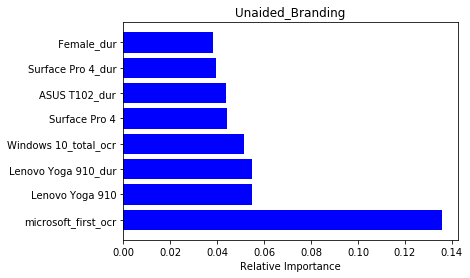

Brand_Cues__Mean
Feature ranking:
1. ASUS T102 (0.070567)
2. ASUS T102_dur (0.070396)
3. Age: 15-24_dur (0.047828)
4. The new Surface Pro_dur (0.046435)
5. The new Surface Pro (0.043003)
6. Age: 25-34_dur (0.040399)
7. African_dur (0.038218)
8. Dell XPS 13 (0.037105)
9. microsoft (0.036203)
10.  Male_dur (0.035657)
11. microsoft_dur (0.032552)
12. Dell XPS 13_dur (0.029882)
13. microsoft_last_ocr (0.028607)
14. microsoft_first_ocr (0.027809)
15. Neutral_dur (0.026283)
16. Surface Go (0.024908)
17. Windows 10_first_ocr (0.023969)
18. Windows 10_last_ocr (0.023381)
19. Happiness_dur (0.021488)
20. Surface Go_dur (0.021301)
21. microsoft_total_ocr (0.020908)
22. Latino_dur (0.020842)
23. Eastasian_dur (0.017757)
24.  Female_dur (0.016952)
25. Country_US (0.016594)
26. Surface Laptop_dur (0.015810)
27. Caucasian_dur (0.014770)
28. Surface Laptop (0.013625)
29. Sadness_dur (0.011250)
30. Age: 35-44_dur (0.009443)
31. Windows 10_total_ocr (0.007718)
32. Windows 10_dur (0.007017)
33. Surprise

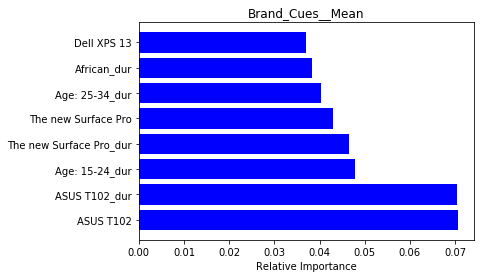

Aided_Branding__Mean
Feature ranking:
1. ASUS T102_dur (0.081736)
2. ASUS T102 (0.063938)
3. microsoft_last_ocr (0.049447)
4. microsoft_first_ocr (0.044148)
5. Happiness_dur (0.042381)
6. Windows 10_first_ocr (0.038422)
7. Dell XPS 13 (0.037130)
8.  Male_dur (0.034951)
9. Age: 25-34_dur (0.034539)
10. Neutral_dur (0.032773)
11. HP Spectre x360, Windows_dur (0.030635)
12. microsoft_total_ocr (0.030035)
13. HP Spectre x360, Windows (0.027902)
14. Dell XPS 13_dur (0.024102)
15. Windows 10_last_ocr (0.021697)
16. microsoft (0.021296)
17. The new Surface Pro_dur (0.020757)
18. Surface Go_dur (0.020414)
19. microsoft_dur (0.019063)
20. Eastasian_dur (0.018400)
21. Lenovo Yoga 910_dur (0.017080)
22. Lenovo Yoga 910 (0.016874)
23. Caucasian_dur (0.015856)
24. African_dur (0.015851)
25. Surface Go (0.014489)
26. Sadness_dur (0.013984)
27.  Female_dur (0.013712)
28. Age: 15-24_dur (0.013586)
29. The new Surface Pro (0.012668)
30. Age: 35-44_dur (0.011477)
31. Windows 10_dur (0.010975)
32. Surfac

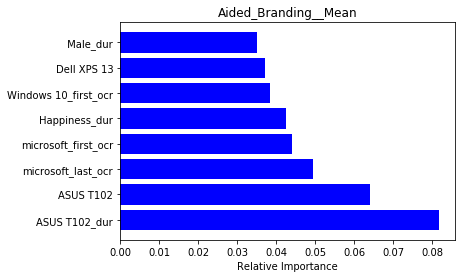

Active_Involvement__Mean
Feature ranking:
1. microsoft_first_ocr (0.055423)
2. microsoft_last_ocr (0.050995)
3. Caucasian_dur (0.049167)
4. length_of_ad_15 (0.048757)
5. microsoft_dur (0.048482)
6. microsoft (0.043178)
7. The new Surface Pro (0.042473)
8. The new Surface Pro_dur (0.038060)
9. microsoft_total_ocr (0.035932)
10. Happiness_dur (0.033956)
11. Eastasian_dur (0.032124)
12. Age: 25-34_dur (0.032074)
13. Surface laptop (0.031617)
14. Surface laptop_dur (0.029146)
15. Neutral_dur (0.026685)
16.  Male_dur (0.026593)
17.  Female_dur (0.024294)
18. Age: 35-44_dur (0.023403)
19. Surprise_dur (0.023093)
20. Country_US (0.022741)
21. The surface Laptop_dur (0.020673)
22. The surface Laptop (0.020104)
23. Sadness_dur (0.019220)
24. African_dur (0.016907)
25. Windows 10 (0.015652)
26. Windows 10_last_ocr (0.015300)
27. Surface Laptop (0.013686)
28. Windows 10_first_ocr (0.013509)
29. Windows 10_dur (0.013193)
30. Windows 10_total_ocr (0.012792)
31. Surface Laptop_dur (0.011024)
32. Del

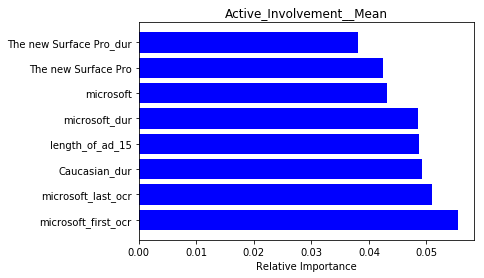

New_Information__Mean
Feature ranking:
1. Windows 10_first_ocr (0.087005)
2. Windows 10_last_ocr (0.084736)
3. African_dur (0.075621)
4. Windows 10_dur (0.070038)
5. microsoft_last_ocr (0.062668)
6. Windows 10_total_ocr (0.060879)
7. Windows 10 (0.060789)
8. Age: 25-34_dur (0.057785)
9. microsoft_first_ocr (0.034689)
10. Age: 35-44_dur (0.026276)
11. microsoft_dur (0.024653)
12. microsoft (0.022868)
13.  Female_dur (0.022601)
14. microsoft_total_ocr (0.019323)
15.  Male_dur (0.019218)
16. Eastasian_dur (0.018180)
17. Neutral_dur (0.017844)
18. Caucasian_dur (0.014876)
19. length_of_ad_15 (0.013042)
20. Surface Pro 4_dur (0.011073)
21. Surface Pro 4 (0.010962)
22. Sadness_dur (0.010608)
23. Windows 10, Windows (0.009567)
24. Windows_dur (0.009360)
25. Windows 10, Windows_dur (0.009135)
26. Happiness_dur (0.007852)
27. Surface Go_dur (0.007569)
28. Surface Go (0.007491)
29. The new Surface Pro_dur (0.006800)
30. The new Surface Pro (0.006520)
31. Windows (0.006087)
32. Disgust_dur (0.005

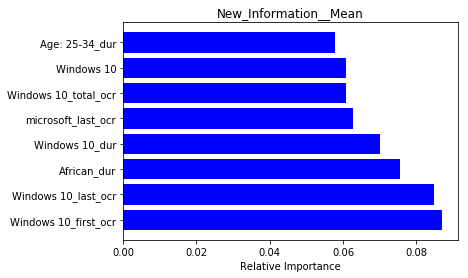

Enjoyment__Mean
Feature ranking:
1. microsoft_last_ocr (0.116000)
2. Country_US (0.110284)
3. Surface Pro 4_dur (0.057121)
4. Surface Pro 4 (0.051485)
5. Windows 10_first_ocr (0.047250)
6. Windows 10_last_ocr (0.044027)
7. Windows 10_dur (0.039045)
8. African_dur (0.037978)
9. Windows 10 (0.032070)
10. Surprise_dur (0.031353)
11. microsoft_first_ocr (0.029798)
12. Windows 10_total_ocr (0.027784)
13. length_of_ad_15 (0.026224)
14. microsoft (0.025244)
15. microsoft_dur (0.023999)
16. microsoft_total_ocr (0.022207)
17.  Male_dur (0.019536)
18. Age: 25-34_dur (0.017936)
19. Happiness_dur (0.017235)
20. Neutral_dur (0.014259)
21.  Female_dur (0.013221)
22. Age: 35-44_dur (0.013044)
23. Eastasian_dur (0.011909)
24. Caucasian_dur (0.011372)
25. Sadness_dur (0.011018)
26. The new Surface Pro_dur (0.009713)
27. The surface Laptop (0.009474)
28. The new Surface Pro (0.009350)
29. The surface Laptop_dur (0.008365)
30. Fear_dur (0.006619)
31. Age: 15-24_dur (0.006004)
32. Surface Laptop_dur (0.00

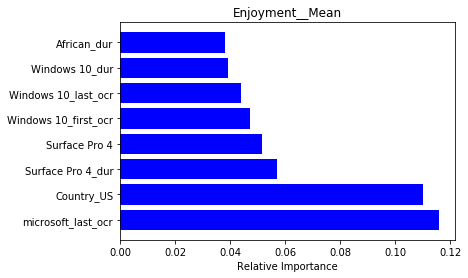

Brand_Appeal__Mean
Feature ranking:
1. African_dur (0.088488)
2. Windows 10_first_ocr (0.088376)
3. Windows 10_last_ocr (0.078856)
4. Windows 10_total_ocr (0.065726)
5. Windows 10_dur (0.064095)
6. microsoft_last_ocr (0.060987)
7. Windows 10 (0.059536)
8. microsoft_first_ocr (0.046446)
9. Country_US (0.036388)
10. Surface laptop (0.022051)
11. Surface laptop_dur (0.021255)
12. microsoft_dur (0.020289)
13. length_of_ad_15 (0.019375)
14. Neutral_dur (0.019016)
15. microsoft (0.017394)
16. Surface Pro 4_dur (0.016578)
17.  Male_dur (0.015087)
18. Eastasian_dur (0.014469)
19. Caucasian_dur (0.012769)
20. Surface Pro 4 (0.012757)
21.  Female_dur (0.012604)
22. Age: 25-34_dur (0.011397)
23. ASUS T102 (0.011353)
24. Windows 10, Windows_dur (0.010269)
25. Happiness_dur (0.010030)
26. The new Surface Pro_dur (0.009720)
27. ASUS T102_dur (0.009443)
28. Windows 10, Windows (0.009414)
29. microsoft_total_ocr (0.008919)
30. Sadness_dur (0.007882)
31. Age: 15-24_dur (0.007608)
32. The new Surface Pr

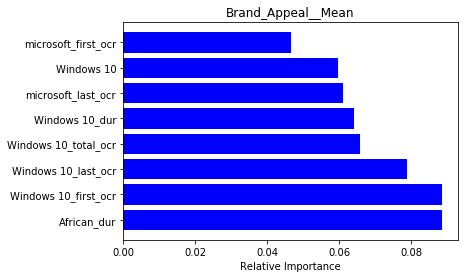

Understanding__Mean
Feature ranking:
1. Country_US (0.145045)
2.  Female_dur (0.083001)
3. Surface Go (0.049499)
4. Surface Go_dur (0.042359)
5. Age: 25-34_dur (0.037041)
6. microsoft (0.031655)
7. microsoft_last_ocr (0.029808)
8. microsoft_dur (0.029339)
9. microsoft_first_ocr (0.028008)
10. Happiness_dur (0.024972)
11. Caucasian_dur (0.023822)
12. Latino_dur (0.023652)
13. Neutral_dur (0.023612)
14.  Male_dur (0.023450)
15. Sadness_dur (0.022989)
16. Windows 10_first_ocr (0.021828)
17. microsoft_total_ocr (0.019414)
18. Eastasian_dur (0.019392)
19. African_dur (0.018869)
20. HP Spectre x360, Windows (0.018825)
21. HP Spectre x360, Windows_dur (0.018636)
22. Surface Laptop_dur (0.017236)
23. Windows 10, Windows (0.016473)
24. Age: 35-44_dur (0.015897)
25. Age: 15-24_dur (0.013865)
26. Surface Laptop (0.013487)
27. Windows 10, Windows_dur (0.011907)
28. Windows 10_last_ocr (0.010887)
29. The new Surface Pro_dur (0.010314)
30. Surface Pro 4 (0.009496)
31. Surface Pro 4_dur (0.008921)
32

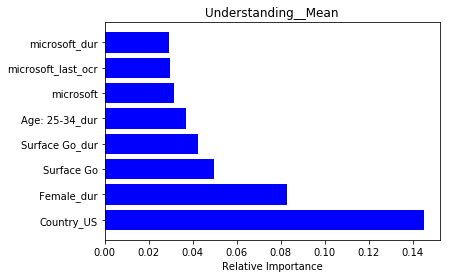

Relevance_of_Information__Mean
Feature ranking:
1. Country_US (0.059158)
2. ASUS T102_dur (0.058481)
3. microsoft (0.054944)
4. microsoft_dur (0.050139)
5. microsoft_last_ocr (0.047888)
6. ASUS T102 (0.046775)
7. Age: 15-24_dur (0.043635)
8. microsoft_first_ocr (0.036654)
9. Neutral_dur (0.036178)
10. Surface Go (0.032617)
11. Surface Go_dur (0.030073)
12. Age: 25-34_dur (0.029416)
13. microsoft_total_ocr (0.028427)
14.  Male_dur (0.027649)
15. Eastasian_dur (0.026010)
16. Happiness_dur (0.025812)
17. African_dur (0.025713)
18. length_of_ad_15 (0.021328)
19. Caucasian_dur (0.020441)
20. Windows 10_last_ocr (0.018262)
21.  Female_dur (0.017953)
22. Windows 10_dur (0.017685)
23. Windows 10_first_ocr (0.016542)
24. Sadness_dur (0.014553)
25. Surface Pen_dur (0.014303)
26. The new Surface Pro_dur (0.013808)
27. Surface Laptop (0.011389)
28. The new Surface Pro (0.011231)
29. Surface Pen (0.010132)
30. Age: 35-44_dur (0.009845)
31. Fear_dur (0.009778)
32. Windows 10 (0.009465)
33. Surface L

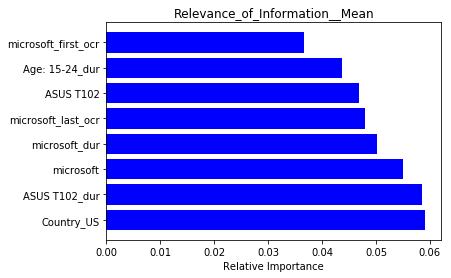

Credibility_of_Information__Mean
Feature ranking:
1. Windows 10_dur (0.047779)
2. microsoft_dur (0.044008)
3. Surface Go (0.043346)
4. microsoft (0.043027)
5. Windows 10, Windows_dur (0.042515)
6. Windows 10_first_ocr (0.042280)
7. microsoft_total_ocr (0.040730)
8. Windows 10, Windows (0.037436)
9. Windows 10 (0.037282)
10. microsoft_last_ocr (0.033342)
11. Surface Go_dur (0.033218)
12. Windows 10_total_ocr (0.031646)
13. Country_US (0.031458)
14. Surface Laptop (0.031413)
15. Windows 10_last_ocr (0.030773)
16.  Male_dur (0.026527)
17. microsoft_first_ocr (0.023356)
18. Neutral_dur (0.021240)
19. Surface Laptop_dur (0.021158)
20.  Female_dur (0.020589)
21. Age: 25-34_dur (0.020171)
22. Windows 10 PCs (0.018969)
23. Surface Pro 4 (0.018153)
24. Happiness_dur (0.018094)
25. The new Surface Pro_dur (0.017674)
26. Windows 10 PCs_dur (0.015902)
27. The new Surface Pro (0.015319)
28. Caucasian_dur (0.014694)
29. Surface Pro 4_dur (0.012760)
30. Eastasian_dur (0.012412)
31. Surface Pen_dur (0

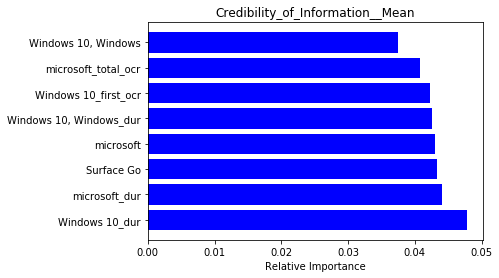

Brand_Difference__Mean
Feature ranking:
1. microsoft_last_ocr (0.102127)
2. length_of_ad_15 (0.066080)
3. Age: 25-34_dur (0.063931)
4. Windows 10_first_ocr (0.041845)
5. Windows 10_last_ocr (0.038200)
6. microsoft_first_ocr (0.030397)
7. Windows 10_dur (0.030355)
8. African_dur (0.027981)
9. Country_US (0.027463)
10. Windows 10 (0.027031)
11. Windows 10_total_ocr (0.025988)
12. Happiness_dur (0.025842)
13. microsoft (0.025608)
14. microsoft_dur (0.023951)
15. Surface Laptop (0.022742)
16. Age: 15-24_dur (0.022336)
17. Surface Laptop_dur (0.021463)
18. Neutral_dur (0.021239)
19.  Female_dur (0.020938)
20. Eastasian_dur (0.020511)
21.  Male_dur (0.018725)
22. microsoft_total_ocr (0.015246)
23. Sadness_dur (0.013237)
24. The new Surface Pro_dur (0.013220)
25. Age: 35-44_dur (0.012709)
26. Windows 10 PCs (0.012058)
27. Windows 10 PCs_dur (0.012002)
28. Caucasian_dur (0.010743)
29. ASUS T102_dur (0.010120)
30. The new Surface Pro (0.010053)
31. Dell PCs (0.009866)
32. Dell PCs_dur (0.009863

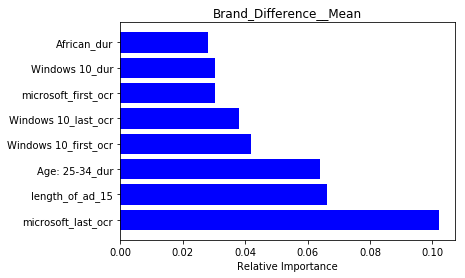

In [52]:
model.plot_feature_importance(models,10,y_test.columns,X_test.columns[1:],savefig=False)

Unaided_Branding
Feature ranking:
1. microsoft_first_ocr (0.135256)
2. Lenovo Yoga 910_dur (0.058085)
3. Windows 10_total_ocr (0.054449)
4. Surface Pro 4 (0.048747)
5. Lenovo Yoga 910 (0.048578)
6. ASUS T102_dur (0.044992)
7. ASUS T102 (0.042073)
8. Surface Pro 4_dur (0.039675)
9.  Female_dur (0.035856)
10. Happiness_dur (0.029275)
11. Windows 10_dur (0.027425)
12. Windows 10_first_ocr (0.027292)
13. Windows 10 (0.025757)
14. Neutral_dur (0.025591)
15. Windows 10_last_ocr (0.021727)
16. Windows 10, Windows (0.020840)
17. microsoft_last_ocr (0.020374)
18. Age: 25-34_dur (0.020159)
19. Windows 10, Windows_dur (0.016922)
20. Age: 0-5_dur (0.016497)
21.  Male_dur (0.016451)
22. microsoft (0.015983)
23. Dell XPS 13 (0.012984)
24. microsoft_dur (0.012919)
25. Dell XPS 13_dur (0.009749)
26. Age: 15-24_dur (0.009434)
27. African_dur (0.009428)
28. Yoga (0.009099)
29. Surface Pro 4, HP Spectre x360_dur (0.007807)
30. Surface Pro 4, Windows 10 (0.007715)
31. Yoga_dur (0.007612)
32. Surface Book_

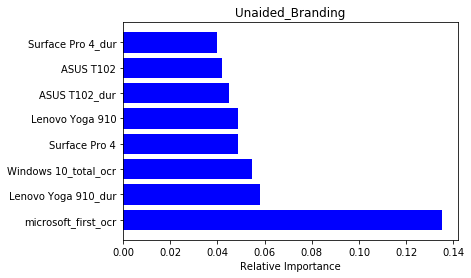

Brand_Cues__Mean
Feature ranking:
1. ASUS T102_dur (0.072243)
2. ASUS T102 (0.069294)
3. The new Surface Pro (0.046597)
4. Age: 25-34_dur (0.041295)
5. The new Surface Pro_dur (0.040554)
6. microsoft_dur (0.039815)
7.  Male_dur (0.038564)
8. African_dur (0.038558)
9. microsoft (0.036345)
10. Dell XPS 13_dur (0.035886)
11. Dell XPS 13 (0.034095)
12. Age: 15-24_dur (0.032785)
13. microsoft_last_ocr (0.032628)
14. microsoft_first_ocr (0.029423)
15. Neutral_dur (0.025619)
16. Windows 10_first_ocr (0.024212)
17. Windows 10_last_ocr (0.023481)
18. Happiness_dur (0.023310)
19. Surface Go (0.021271)
20. Surface Go_dur (0.021255)
21. Latino_dur (0.020258)
22. Eastasian_dur (0.019057)
23. microsoft_total_ocr (0.018359)
24.  Female_dur (0.018126)
25. Country_US (0.016729)
26. Surface Laptop (0.015308)
27. Surface Laptop_dur (0.015209)
28. Caucasian_dur (0.015127)
29. Sadness_dur (0.009751)
30. Age: 35-44_dur (0.008634)
31. Surprise_dur (0.008397)
32. Windows 10 (0.008261)
33. Surface Pro 4 (0.006

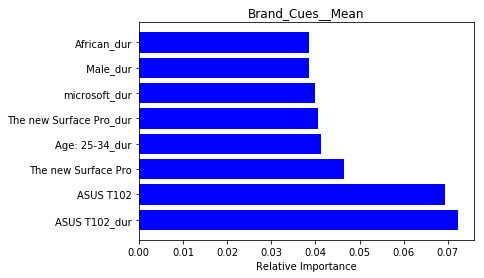

Aided_Branding__Mean
Feature ranking:
1. ASUS T102_dur (0.070554)
2. microsoft_last_ocr (0.063860)
3. ASUS T102 (0.058065)
4. Age: 25-34_dur (0.043766)
5. Dell XPS 13_dur (0.039043)
6. microsoft_total_ocr (0.038890)
7. microsoft_first_ocr (0.038448)
8. Happiness_dur (0.034463)
9. HP Spectre x360, Windows (0.033772)
10. Windows 10_first_ocr (0.033653)
11. Neutral_dur (0.033195)
12.  Male_dur (0.030351)
13. Dell XPS 13 (0.027707)
14. Windows 10_last_ocr (0.025980)
15. HP Spectre x360, Windows_dur (0.022232)
16. microsoft_dur (0.021129)
17. microsoft (0.020833)
18. Surface Go (0.019021)
19. Caucasian_dur (0.018672)
20. The new Surface Pro (0.018208)
21. Eastasian_dur (0.017982)
22. Lenovo Yoga 910_dur (0.016272)
23. The new Surface Pro_dur (0.016014)
24.  Female_dur (0.015502)
25. Sadness_dur (0.014923)
26. African_dur (0.014624)
27. Lenovo Yoga 910 (0.014287)
28. Surface Go_dur (0.013795)
29. Age: 35-44_dur (0.012008)
30. Age: 15-24_dur (0.011675)
31. Windows 10_dur (0.011370)
32. Surfac

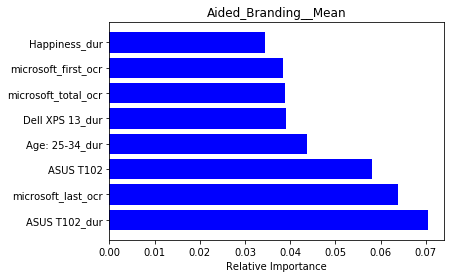

Active_Involvement__Mean
Feature ranking:
1. microsoft_last_ocr (0.056910)
2. microsoft_first_ocr (0.053887)
3. Caucasian_dur (0.049375)
4. microsoft_dur (0.048232)
5. microsoft (0.045254)
6. length_of_ad_15 (0.042306)
7. The new Surface Pro_dur (0.040738)
8. The new Surface Pro (0.036790)
9. Surface laptop_dur (0.034564)
10. microsoft_total_ocr (0.034390)
11. Happiness_dur (0.033795)
12. Surface laptop (0.032165)
13. Age: 25-34_dur (0.030814)
14. Eastasian_dur (0.030734)
15. Neutral_dur (0.028271)
16.  Female_dur (0.026645)
17.  Male_dur (0.024266)
18. Country_US (0.024168)
19. Age: 35-44_dur (0.021956)
20. The surface Laptop_dur (0.021178)
21. Sadness_dur (0.020847)
22. Surprise_dur (0.019212)
23. African_dur (0.017809)
24. Windows 10_last_ocr (0.017219)
25. The surface Laptop (0.016215)
26. Windows 10 (0.014537)
27. Windows 10_dur (0.013889)
28. Surface Laptop_dur (0.013633)
29. Windows 10_first_ocr (0.012854)
30. Windows 10_total_ocr (0.012796)
31. Surface Laptop (0.012140)
32. Del

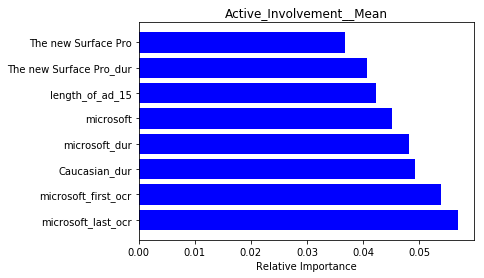

New_Information__Mean
Feature ranking:
1. Windows 10 (0.087371)
2. African_dur (0.081813)
3. Windows 10_last_ocr (0.077163)
4. Windows 10_first_ocr (0.067421)
5. Windows 10_total_ocr (0.064069)
6. microsoft_last_ocr (0.063443)
7. Age: 25-34_dur (0.062609)
8. Windows 10_dur (0.062586)
9. microsoft_first_ocr (0.035810)
10. Age: 35-44_dur (0.026169)
11. microsoft (0.023278)
12. microsoft_dur (0.023037)
13.  Male_dur (0.022203)
14.  Female_dur (0.018189)
15. Neutral_dur (0.017973)
16. microsoft_total_ocr (0.017932)
17. Eastasian_dur (0.015433)
18. Caucasian_dur (0.014481)
19. Surface Pro 4_dur (0.013704)
20. length_of_ad_15 (0.010931)
21. Surface Pro 4 (0.010639)
22. Sadness_dur (0.009850)
23. Windows 10, Windows_dur (0.008771)
24. Happiness_dur (0.007666)
25. Windows 10, Windows (0.007572)
26. The new Surface Pro (0.007233)
27. Surface Go (0.007031)
28. Windows (0.006639)
29. The new Surface Pro_dur (0.006452)
30. Surface Go_dur (0.006422)
31. HP Spectre x360, Windows_dur (0.005496)
32. D

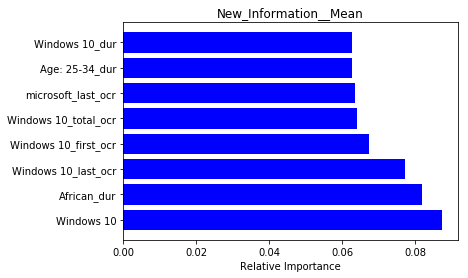

Enjoyment__Mean
Feature ranking:
1. Country_US (0.109560)
2. microsoft_last_ocr (0.108842)
3. Surface Pro 4 (0.052503)
4. Surface Pro 4_dur (0.052459)
5. Windows 10_first_ocr (0.043618)
6. Windows 10_last_ocr (0.043110)
7. African_dur (0.040795)
8. Windows 10 (0.037729)
9. Windows 10_dur (0.033097)
10. microsoft_first_ocr (0.032137)
11. Surprise_dur (0.031674)
12. Windows 10_total_ocr (0.028981)
13. microsoft (0.026690)
14. microsoft_dur (0.026625)
15. length_of_ad_15 (0.026251)
16. microsoft_total_ocr (0.023696)
17.  Male_dur (0.019758)
18. Age: 25-34_dur (0.017649)
19. Happiness_dur (0.017315)
20. Neutral_dur (0.015112)
21.  Female_dur (0.015102)
22. Age: 35-44_dur (0.013882)
23. Caucasian_dur (0.012911)
24. Eastasian_dur (0.011929)
25. Sadness_dur (0.011327)
26. The new Surface Pro (0.009461)
27. The new Surface Pro_dur (0.008544)
28. The surface Laptop_dur (0.008248)
29. Age: 15-24_dur (0.007874)
30. The surface Laptop (0.007669)
31. Fear_dur (0.006833)
32. Surface Laptop (0.005145

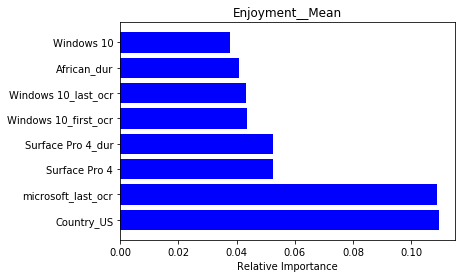

Brand_Appeal__Mean
Feature ranking:
1. Windows 10_last_ocr (0.093664)
2. African_dur (0.084506)
3. Windows 10_first_ocr (0.084133)
4. Windows 10_dur (0.066375)
5. microsoft_last_ocr (0.059592)
6. Windows 10 (0.058788)
7. Windows 10_total_ocr (0.056270)
8. microsoft_first_ocr (0.049218)
9. Country_US (0.036645)
10. Surface laptop (0.022390)
11. Surface laptop_dur (0.021255)
12. microsoft (0.020222)
13. Neutral_dur (0.019320)
14. microsoft_dur (0.018224)
15. length_of_ad_15 (0.016291)
16. Surface Pro 4_dur (0.015405)
17. Surface Pro 4 (0.015397)
18. Windows 10, Windows (0.014984)
19.  Male_dur (0.014940)
20. Eastasian_dur (0.013965)
21.  Female_dur (0.012233)
22. Caucasian_dur (0.012127)
23. Age: 25-34_dur (0.011345)
24. ASUS T102_dur (0.010326)
25. ASUS T102 (0.010237)
26. Happiness_dur (0.009684)
27. Windows 10, Windows_dur (0.009348)
28. microsoft_total_ocr (0.009142)
29. Sadness_dur (0.008519)
30. The new Surface Pro_dur (0.007961)
31. The new Surface Pro (0.007939)
32. Age: 15-24_du

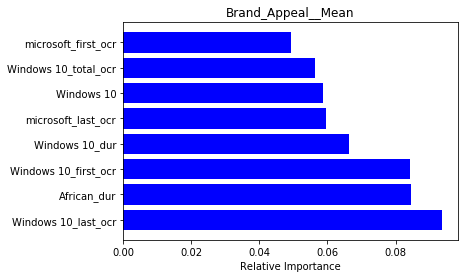

Understanding__Mean
Feature ranking:
1. Country_US (0.154781)
2.  Female_dur (0.078170)
3. Surface Go_dur (0.045961)
4. Surface Go (0.042574)
5. Age: 25-34_dur (0.034406)
6. microsoft_last_ocr (0.032132)
7. microsoft_dur (0.031921)
8. microsoft (0.030346)
9. microsoft_first_ocr (0.028354)
10. Happiness_dur (0.026399)
11. Caucasian_dur (0.026304)
12. Neutral_dur (0.025878)
13.  Male_dur (0.025560)
14. Latino_dur (0.021591)
15. Sadness_dur (0.021586)
16. Windows 10_first_ocr (0.020429)
17. Eastasian_dur (0.019687)
18. Age: 35-44_dur (0.019341)
19. HP Spectre x360, Windows (0.019200)
20. HP Spectre x360, Windows_dur (0.018573)
21. microsoft_total_ocr (0.018442)
22. African_dur (0.017831)
23. Windows 10_last_ocr (0.014798)
24. Windows 10, Windows_dur (0.014019)
25. Age: 15-24_dur (0.013962)
26. Surface Laptop (0.013164)
27. Surface Laptop_dur (0.012404)
28. Windows 10, Windows (0.010191)
29. The new Surface Pro (0.009808)
30. The new Surface Pro_dur (0.009657)
31. Surface Pro 4 (0.008753)


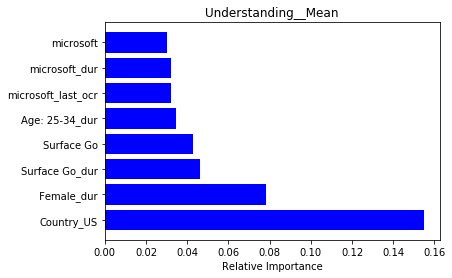

Relevance_of_Information__Mean
Feature ranking:
1. microsoft_dur (0.061648)
2. Country_US (0.059686)
3. microsoft_last_ocr (0.057566)
4. microsoft (0.052795)
5. ASUS T102_dur (0.049314)
6. ASUS T102 (0.046100)
7. Age: 15-24_dur (0.044463)
8. microsoft_first_ocr (0.036488)
9. Neutral_dur (0.035202)
10.  Male_dur (0.034308)
11. Surface Go (0.030201)
12. Eastasian_dur (0.028631)
13. Surface Go_dur (0.028502)
14. microsoft_total_ocr (0.027612)
15. Age: 25-34_dur (0.026548)
16. Happiness_dur (0.025535)
17. African_dur (0.023970)
18. Windows 10_last_ocr (0.023400)
19.  Female_dur (0.020608)
20. Caucasian_dur (0.017872)
21. length_of_ad_15 (0.017681)
22. Windows 10_first_ocr (0.015548)
23. The new Surface Pro (0.014114)
24. Sadness_dur (0.012418)
25. Surface Pen (0.012150)
26. Windows 10 (0.011199)
27. Windows 10_dur (0.011173)
28. Surface Laptop_dur (0.010787)
29. The new Surface Pro_dur (0.010337)
30. Fear_dur (0.010261)
31. Age: 35-44_dur (0.010234)
32. Surface Laptop (0.009921)
33. Surfac

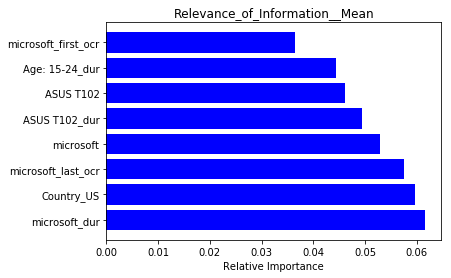

Credibility_of_Information__Mean
Feature ranking:
1. microsoft_dur (0.046219)
2. Windows 10 (0.045547)
3. microsoft (0.044701)
4. Windows 10_dur (0.043371)
5. Windows 10, Windows (0.043172)
6. Windows 10_last_ocr (0.042638)
7. Surface Go (0.038015)
8. Surface Go_dur (0.035939)
9. microsoft_total_ocr (0.035464)
10. Windows 10_total_ocr (0.033583)
11. Windows 10, Windows_dur (0.033536)
12. Country_US (0.031980)
13. Windows 10_first_ocr (0.026237)
14. microsoft_last_ocr (0.026032)
15.  Male_dur (0.025778)
16. microsoft_first_ocr (0.025776)
17. Surface Laptop_dur (0.025731)
18. Surface Laptop (0.023916)
19. The new Surface Pro_dur (0.023461)
20. Neutral_dur (0.023293)
21. Age: 25-34_dur (0.022952)
22. Happiness_dur (0.022870)
23.  Female_dur (0.018817)
24. Windows 10 PCs_dur (0.017553)
25. Surface Pro 4_dur (0.016587)
26. The new Surface Pro (0.016454)
27. Windows 10 PCs (0.016284)
28. Caucasian_dur (0.016043)
29. Eastasian_dur (0.013841)
30. Surface Pro 4 (0.013145)
31. Surface Pen (0.011

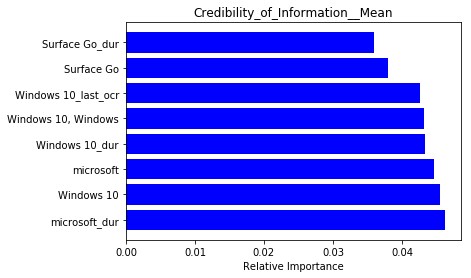

Brand_Difference__Mean
Feature ranking:
1. microsoft_last_ocr (0.100936)
2. Age: 25-34_dur (0.063239)
3. length_of_ad_15 (0.062988)
4. Windows 10_last_ocr (0.040478)
5. Windows 10_first_ocr (0.038534)
6. microsoft_first_ocr (0.030953)
7. Windows 10_total_ocr (0.028505)
8. African_dur (0.028416)
9. Windows 10 (0.027865)
10. Happiness_dur (0.027520)
11. microsoft_dur (0.026340)
12. microsoft (0.025243)
13. Country_US (0.024394)
14. Surface Laptop (0.024262)
15. Windows 10_dur (0.023843)
16. Age: 15-24_dur (0.022708)
17. Eastasian_dur (0.021818)
18.  Female_dur (0.020885)
19. Neutral_dur (0.020853)
20.  Male_dur (0.019647)
21. Surface Laptop_dur (0.019542)
22. microsoft_total_ocr (0.015983)
23. Sadness_dur (0.013022)
24. Windows 10 PCs (0.012639)
25. Windows 10 PCs_dur (0.011815)
26. The new Surface Pro (0.011807)
27. Age: 35-44_dur (0.011796)
28. The new Surface Pro_dur (0.011357)
29. ASUS T102 (0.010694)
30. ASUS T102_dur (0.010533)
31. Caucasian_dur (0.010387)
32. Dell XPS 13_dur (0.01

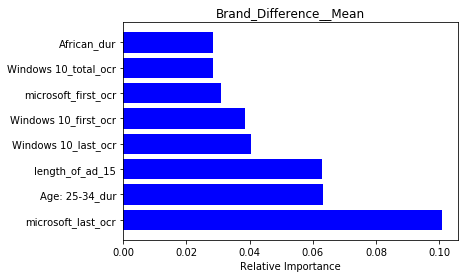

In [38]:
model.plot_feature_importance(models,10,y_test.columns,X_test.columns[1:],savefig=False)

In [ ]:
params = {'max_depth': [5,10,13,15,20,30,50,100], 'max_features': [0.2,0.25,0.3,0.4,0.5,0.6], 'min_samples_leaf': [2,4],'presort':[True,False]}
model.gridSearchCV(parameters=params,X_df=X_train.drop('Video Name',1),y_df=y_train['Aided_Branding__Mean'],cv=3)

In [35]:
shap.initjs()
explainer=[]
shap_values=[]
for i in range(11):
    explainer.append(shap.TreeExplainer(models[i]))
    shap_values.append(explainer[-1].shap_values(X_train.drop('Video Name',1)))
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [32]:
shap.initjs()
explainer= shap.TreeExplainer(models[3])
shap_values= explainer.shap_values(X_train.drop('Video Name',1))

In [ ]:
explainer_relevance

In [338]:
X_train['Video Name'][(X_train['Video Name'].isna())== False]

9                       208 Win10_US_15_Toney Drawing_TV
82                Bug Chicks Inking - SW Win 10 15 TV US
64                    Angela Inking - SW Win 10 15 TV US
119                    Tim Flach - Surface Book 30 TV US
110                  News Go fast - Surface SP4 30 TV US
121                          Trey - Surface SP4 30 TV US
40                       250 Surface Pro_AUS_30_Bujar_TV
124                          Victoria - ATL SP4 30 TV US
34           241 Surface Laptop_US_30_Brodie FINAL GP_TV
21                    220 Surface Laptop_US_15_Brodie_TV
120                  Tim Flach Power - Surface 15 OLV US
127                   Yasmin Power - ATL Win 10 15 TV US
80                 Bug Chicks Hello - SW Win 10 15 TV US
22     221 BATCH RE-TEST: Surface Book_US_30_Jorge/Sa...
122                    Trey Power - Surface SP4 15 TV US
66                         Ariela - Surface SP4 30 TV US
84            College Girls Cortana - SW Win 10 15 TV US
101                       Mancu

In [339]:
# for i in range(11):
i=0
j=660

print("\n",Y.columns.values[i])
shap.force_plot(explainer[i].expected_value, shap_values[i][j,:], X_train.drop('Video Name',1).iloc[j,:])


 Unaided_Branding


In [ ]:
X_train.iloc

In [136]:
X_train['microsoft'].min()

0.0

In [150]:
X_train['Windows 10'].max()

11.0

In [147]:
X_train[X_train['Windows 10_first_ocr'] ==X_train['Windows 10_first_ocr'].min()]

Video Name  Country_US  length_of_ad_15  \
498                                         NaN    1.000000                0   
243                                         NaN    0.884755                0   
202                                         NaN    0.411160                0   
306                                         NaN    1.000000                0   
166                                         NaN    1.000000                0   
724                                         NaN    1.000000                1   
263                                         NaN    1.000000                0   
326                                         NaN    1.000000                0   
150                                         NaN    1.000000                0   
469                                         NaN    1.000000                0   
9              208 Win10_US_15_Toney Drawing_TV    1.000000                1   
254                                         NaN    1.000000                0   
952                                         NaN    1.000000                1   
379                                         NaN    0.867482                0   
581                                         NaN    1.000000                1   
64           Angela Inking - SW Win 10 15 TV US    1.000000                1   
767                                         NaN    1.000000                1   
528                                         NaN    1.000000                0   
449                                         NaN    0.000000                0   
119           Tim Flach - Surface Book 30 TV US    1.000000                1   
777                                         NaN    1.000000                1   
664                                         NaN    1.000000                1   
518                                         NaN    1.000000                0   
711                                         NaN    1.000000                1   
121                 Trey - Surface SP4 30 TV US    1.000000                1   
712                                         NaN    1.000000                1   
543                                         NaN    0.743961                0   
492                                         NaN    0.731838                0   
858                                         NaN    1.000000                1   
399                                         NaN    1.000000                0   
..                                          ...         ...              ...   
996                                         NaN    1.000000                1   
39               249 Surface Pro_UK_30_Bujar_TV    0.000000                0   
340                                         NaN    0.857628                0   
2                      201 Win10_UK_30_Toney_TV    0.000000                0   
451                                         NaN    1.000000                0   
823                                         NaN    1.000000                1   
817                                         NaN    1.000000                1   
68             Beowulf Pen - SW Win 10 15 TV US    1.000000                1   
608                                         NaN    1.000000                1   
420                                         NaN    0.744995                0   
846                                         NaN    1.000000                1   
339                                         NaN    0.267863                0   
224                                         NaN    0.459517                0   
942                                         NaN    1.000000                1   
47      274 Surface Laptop_US_30_Courtney v2_TV    1.000000                0   
113             Quads Pen - ATL Win 10 15 TV US    1.000000                0   
96         Jorge Sandra - Surface Book 30 TV US    1.000000                1   
737                                         NaN    1.000000                1   
214                                  

In [139]:
k = X_train[X_train['Latino_dur'] == X_train['Latino_dur'].max()].iloc[0]

In [140]:
shap.force_plot(explainer[i].expected_value, shap_values[i], X_train.drop('Video Name',1))

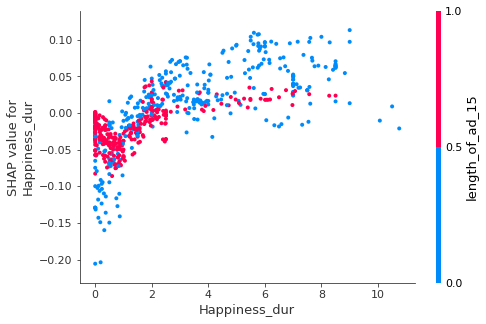

In [33]:
shap.dependence_plot("Happiness_dur",shap_values,X_train.drop('Video Name',1))

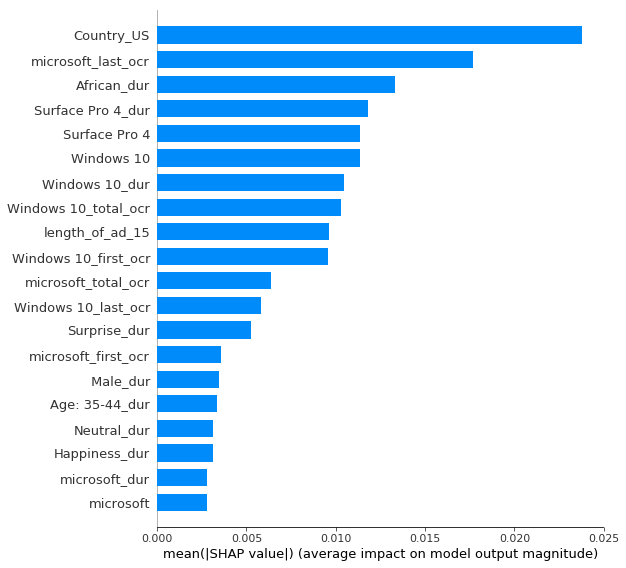

In [37]:
shap.summary_plot(shap_values[5],X_train.drop('Video Name',1),plot_type="bar")

In [72]:
model = Model('xgb')

In [73]:
models_xgb = model.train(X_train,y_train,X_test,y_test,metrics='r2',plot_error=False)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished


For training set
r2_score: 0.932715
For test set
r2_score: 0.948428


Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


For training set
r2_score: 0.888287
For test set
r2_score: 0.873817


Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


For training set
r2_score: 0.865162
For test set
r2_score: 0.857622


Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


For training set
r2_score: 0.882930
For test set
r2_score: 0.884191


New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


For training set
r2_score: 0.922087
For test set
r2_score: 0.930518


Enjoyment__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


For training set
r2_score: 0.866349
For test set
r2_score: 0.919331


Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


For training set
r2_score: 0.935196
For test set
r2_score: 0.942683


Understanding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


For training set
r2_score: 0.900279
For test set
r2_score: 0.916793


Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


For training set
r2_score: 0.854087
For test set
r2_score: 0.846101


Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


For training set
r2_score: 0.896777
For test set
r2_score: 0.908504


Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


For training set
r2_score: 0.897478
For test set
r2_score: 0.904591




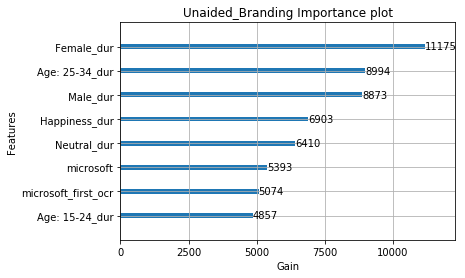

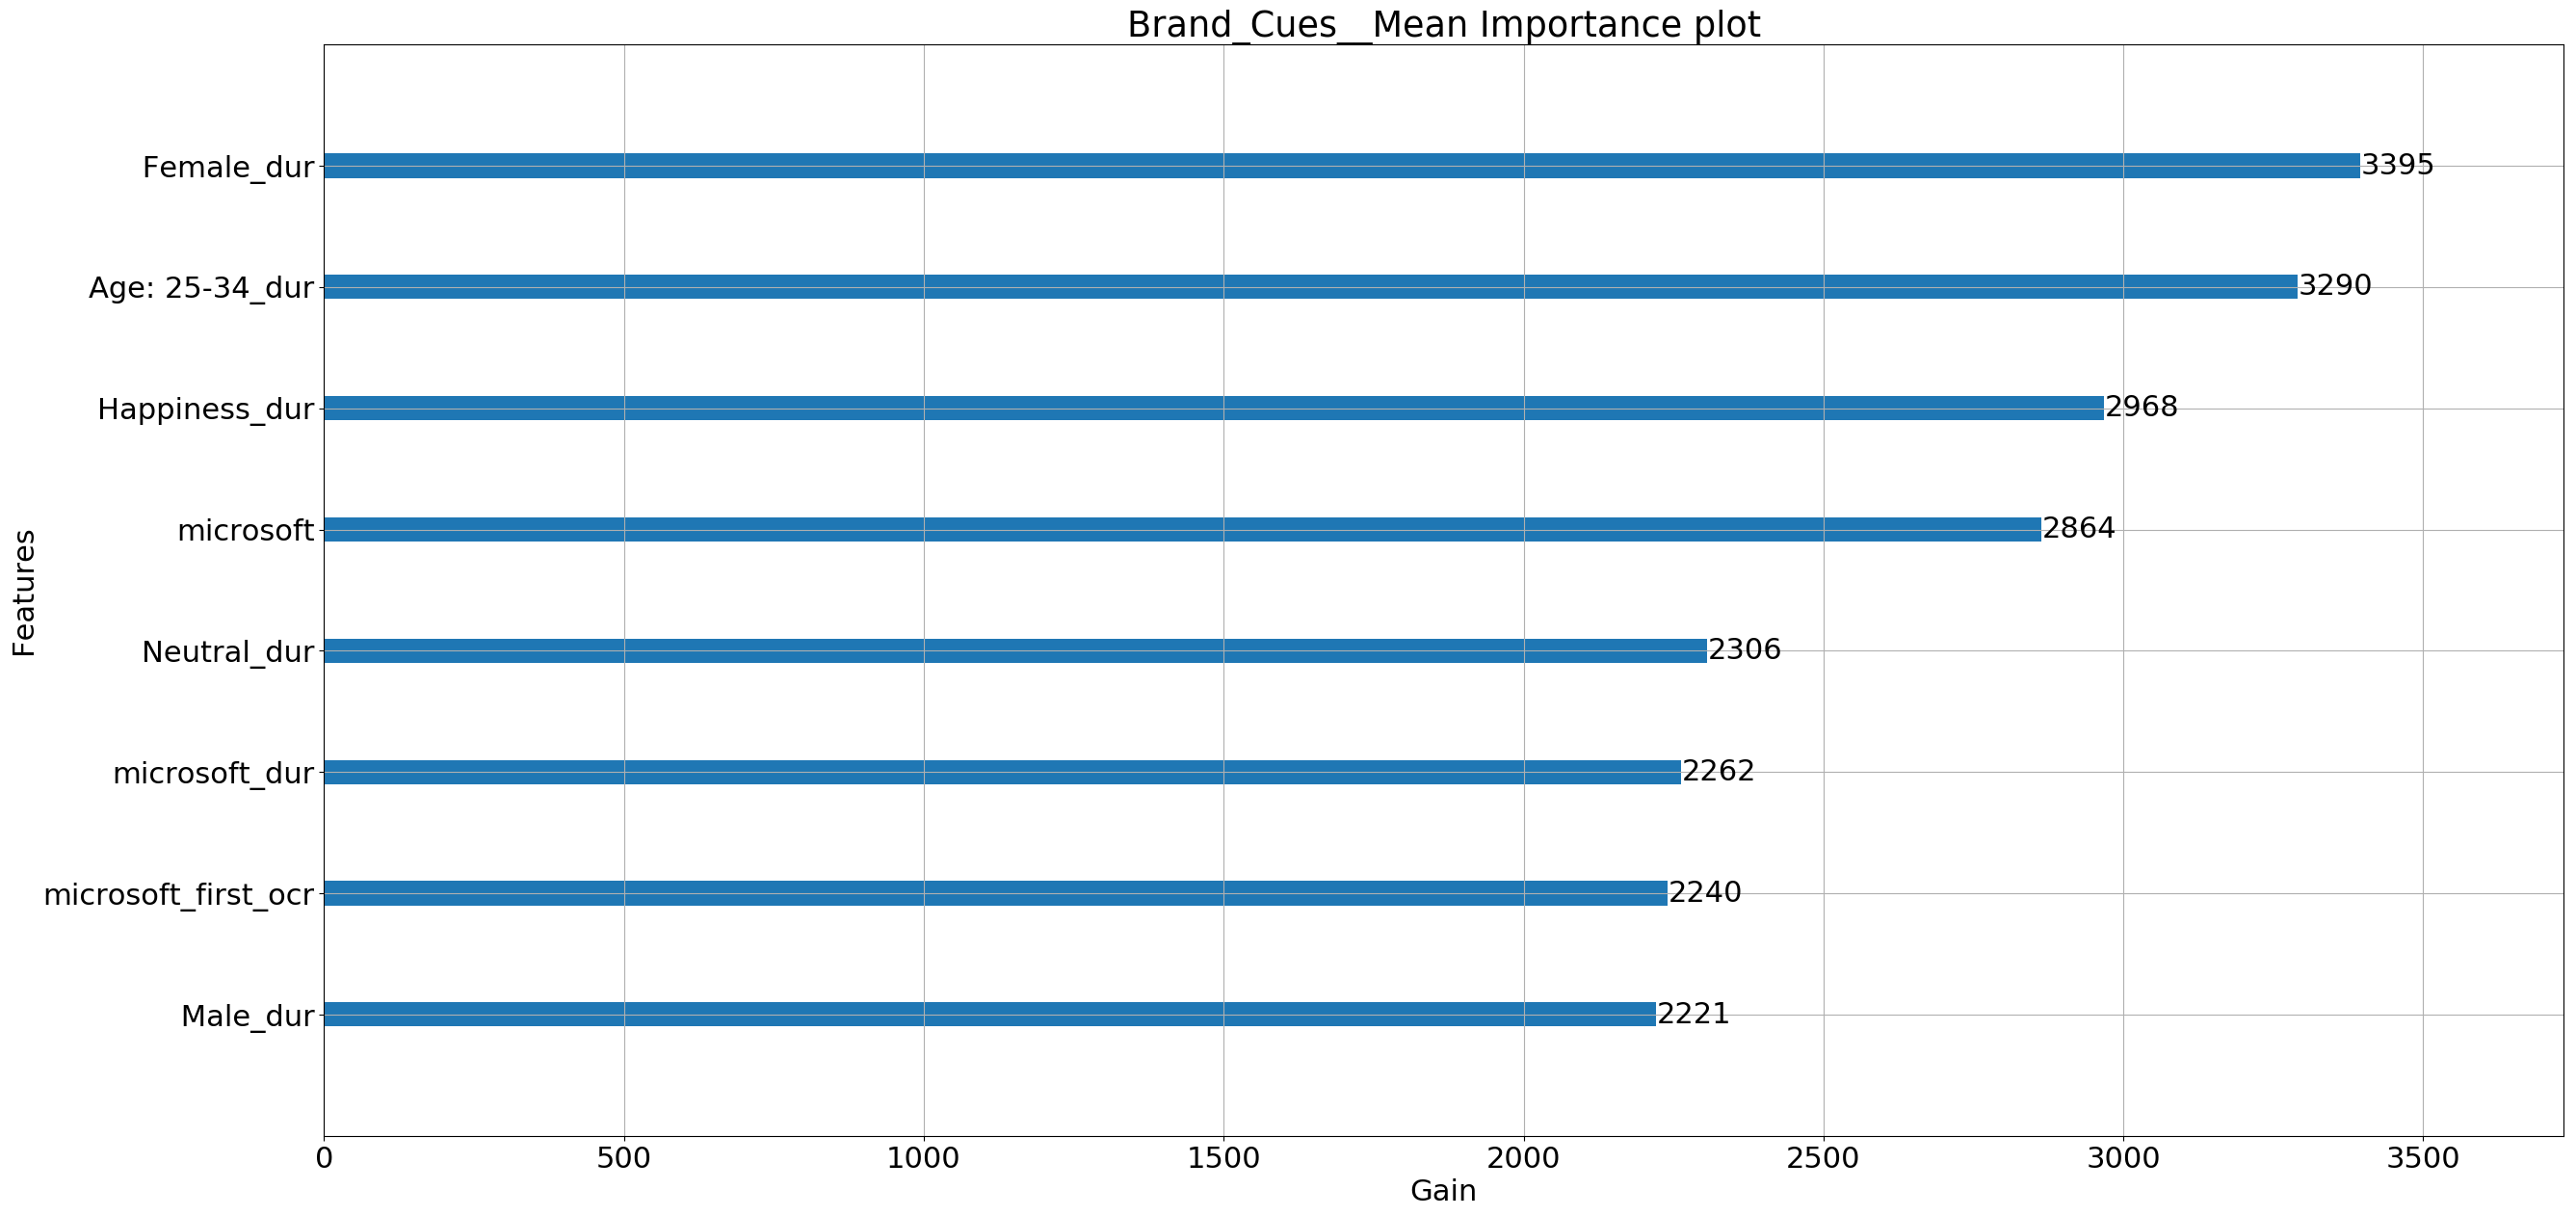

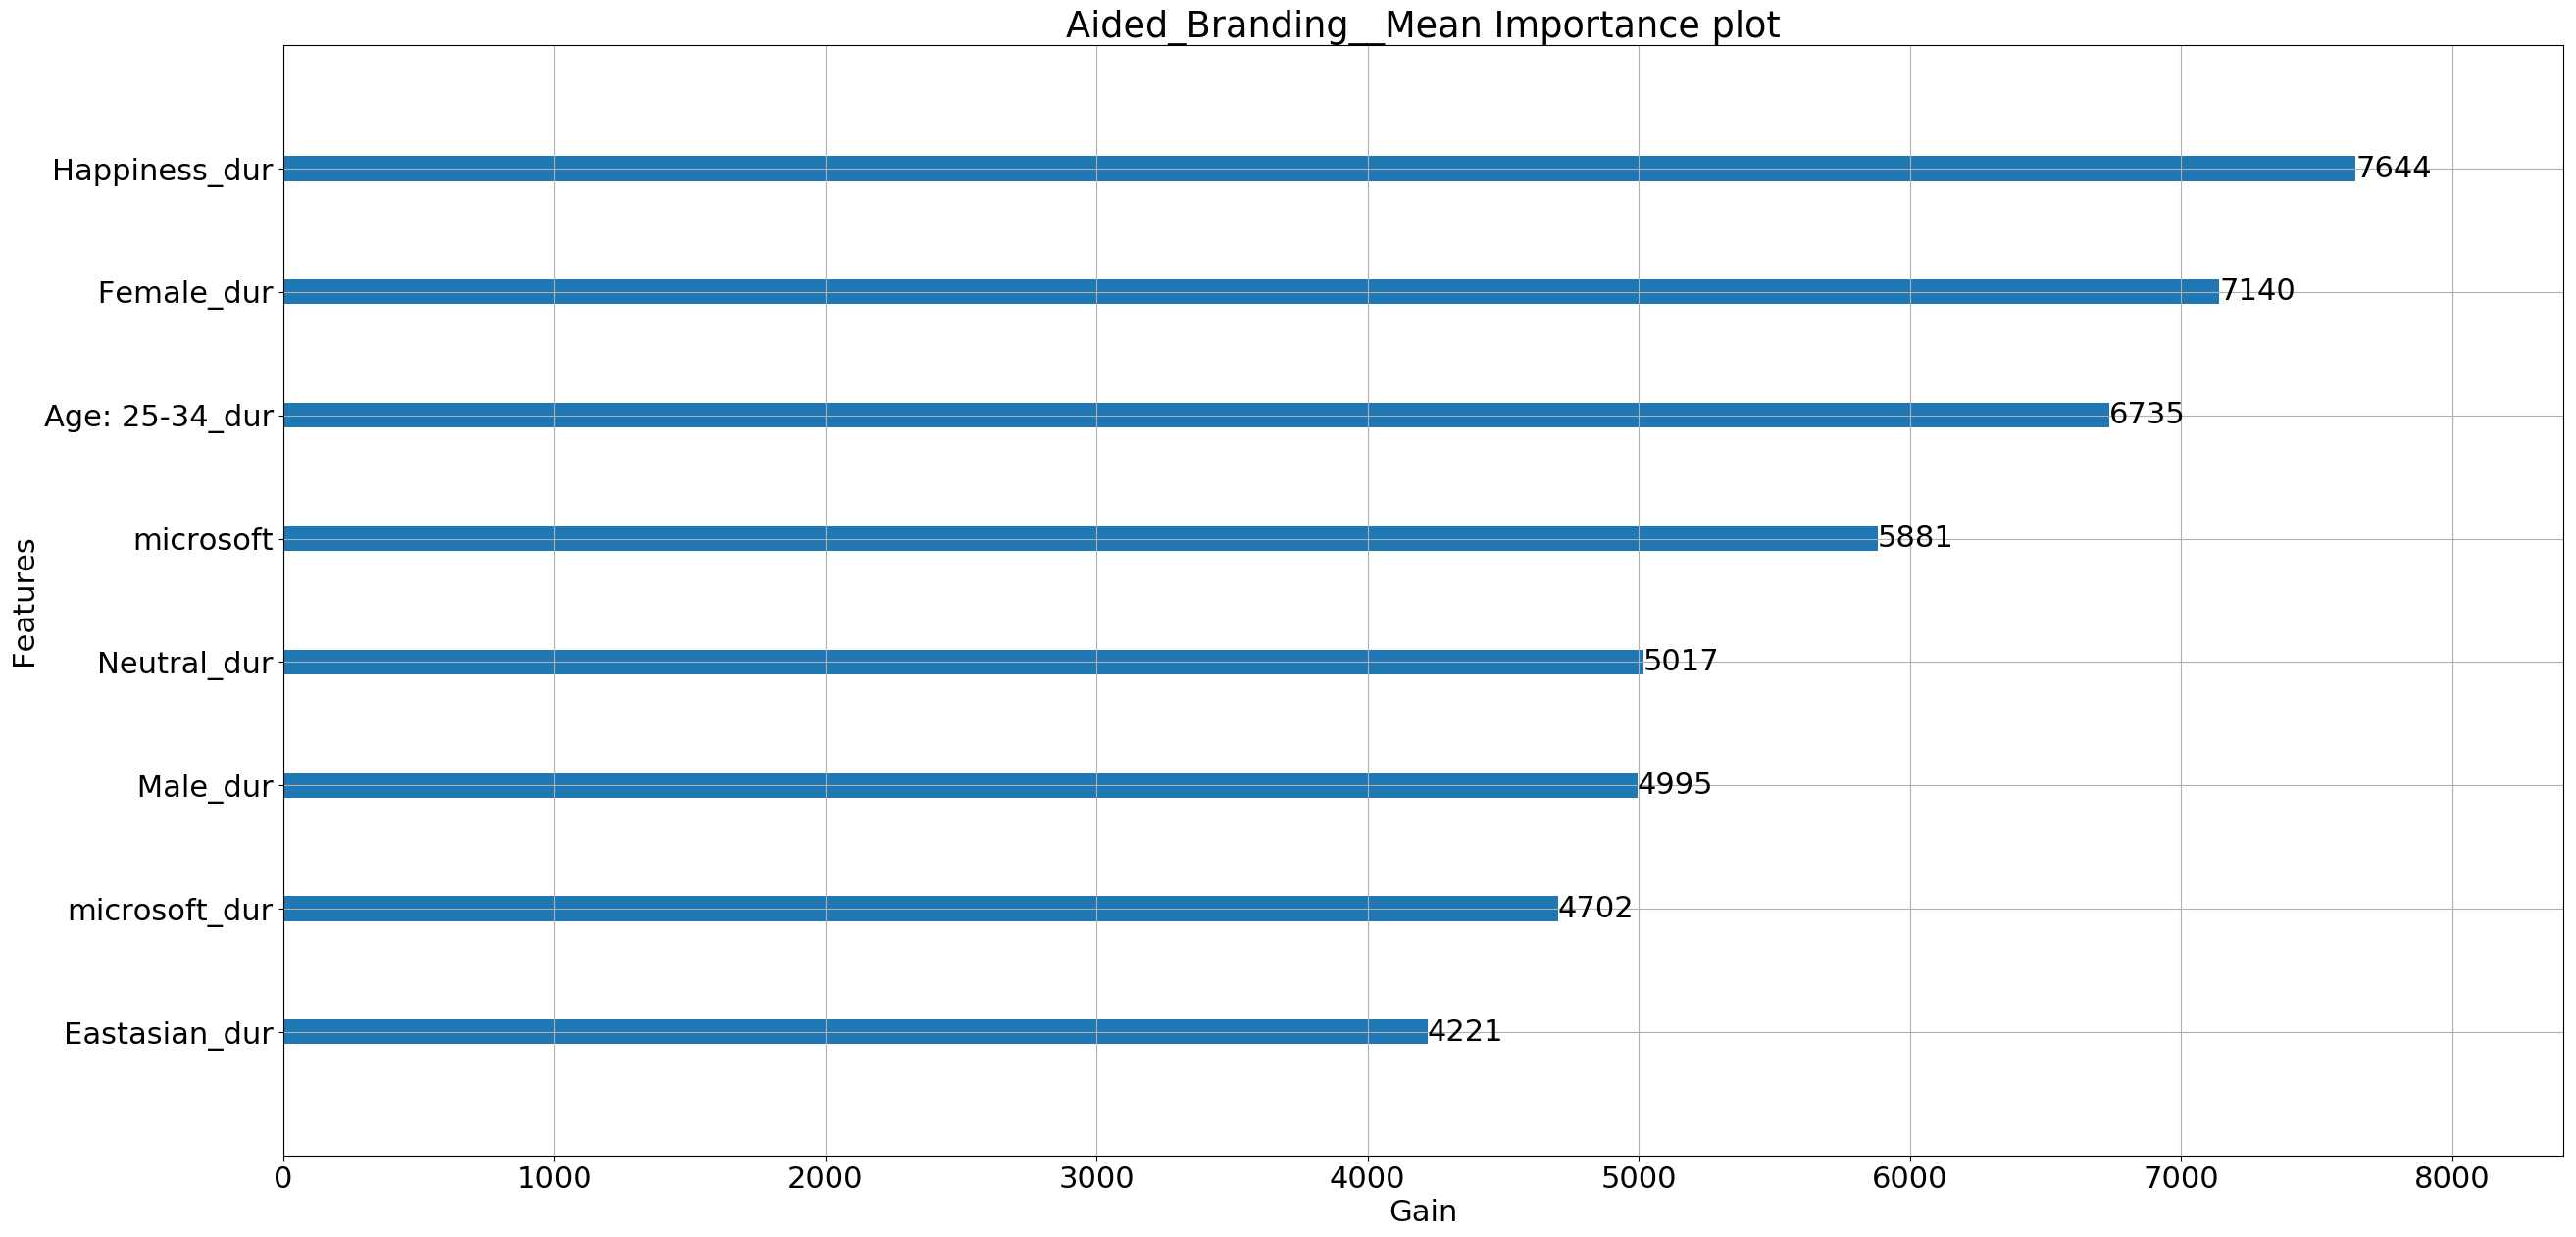

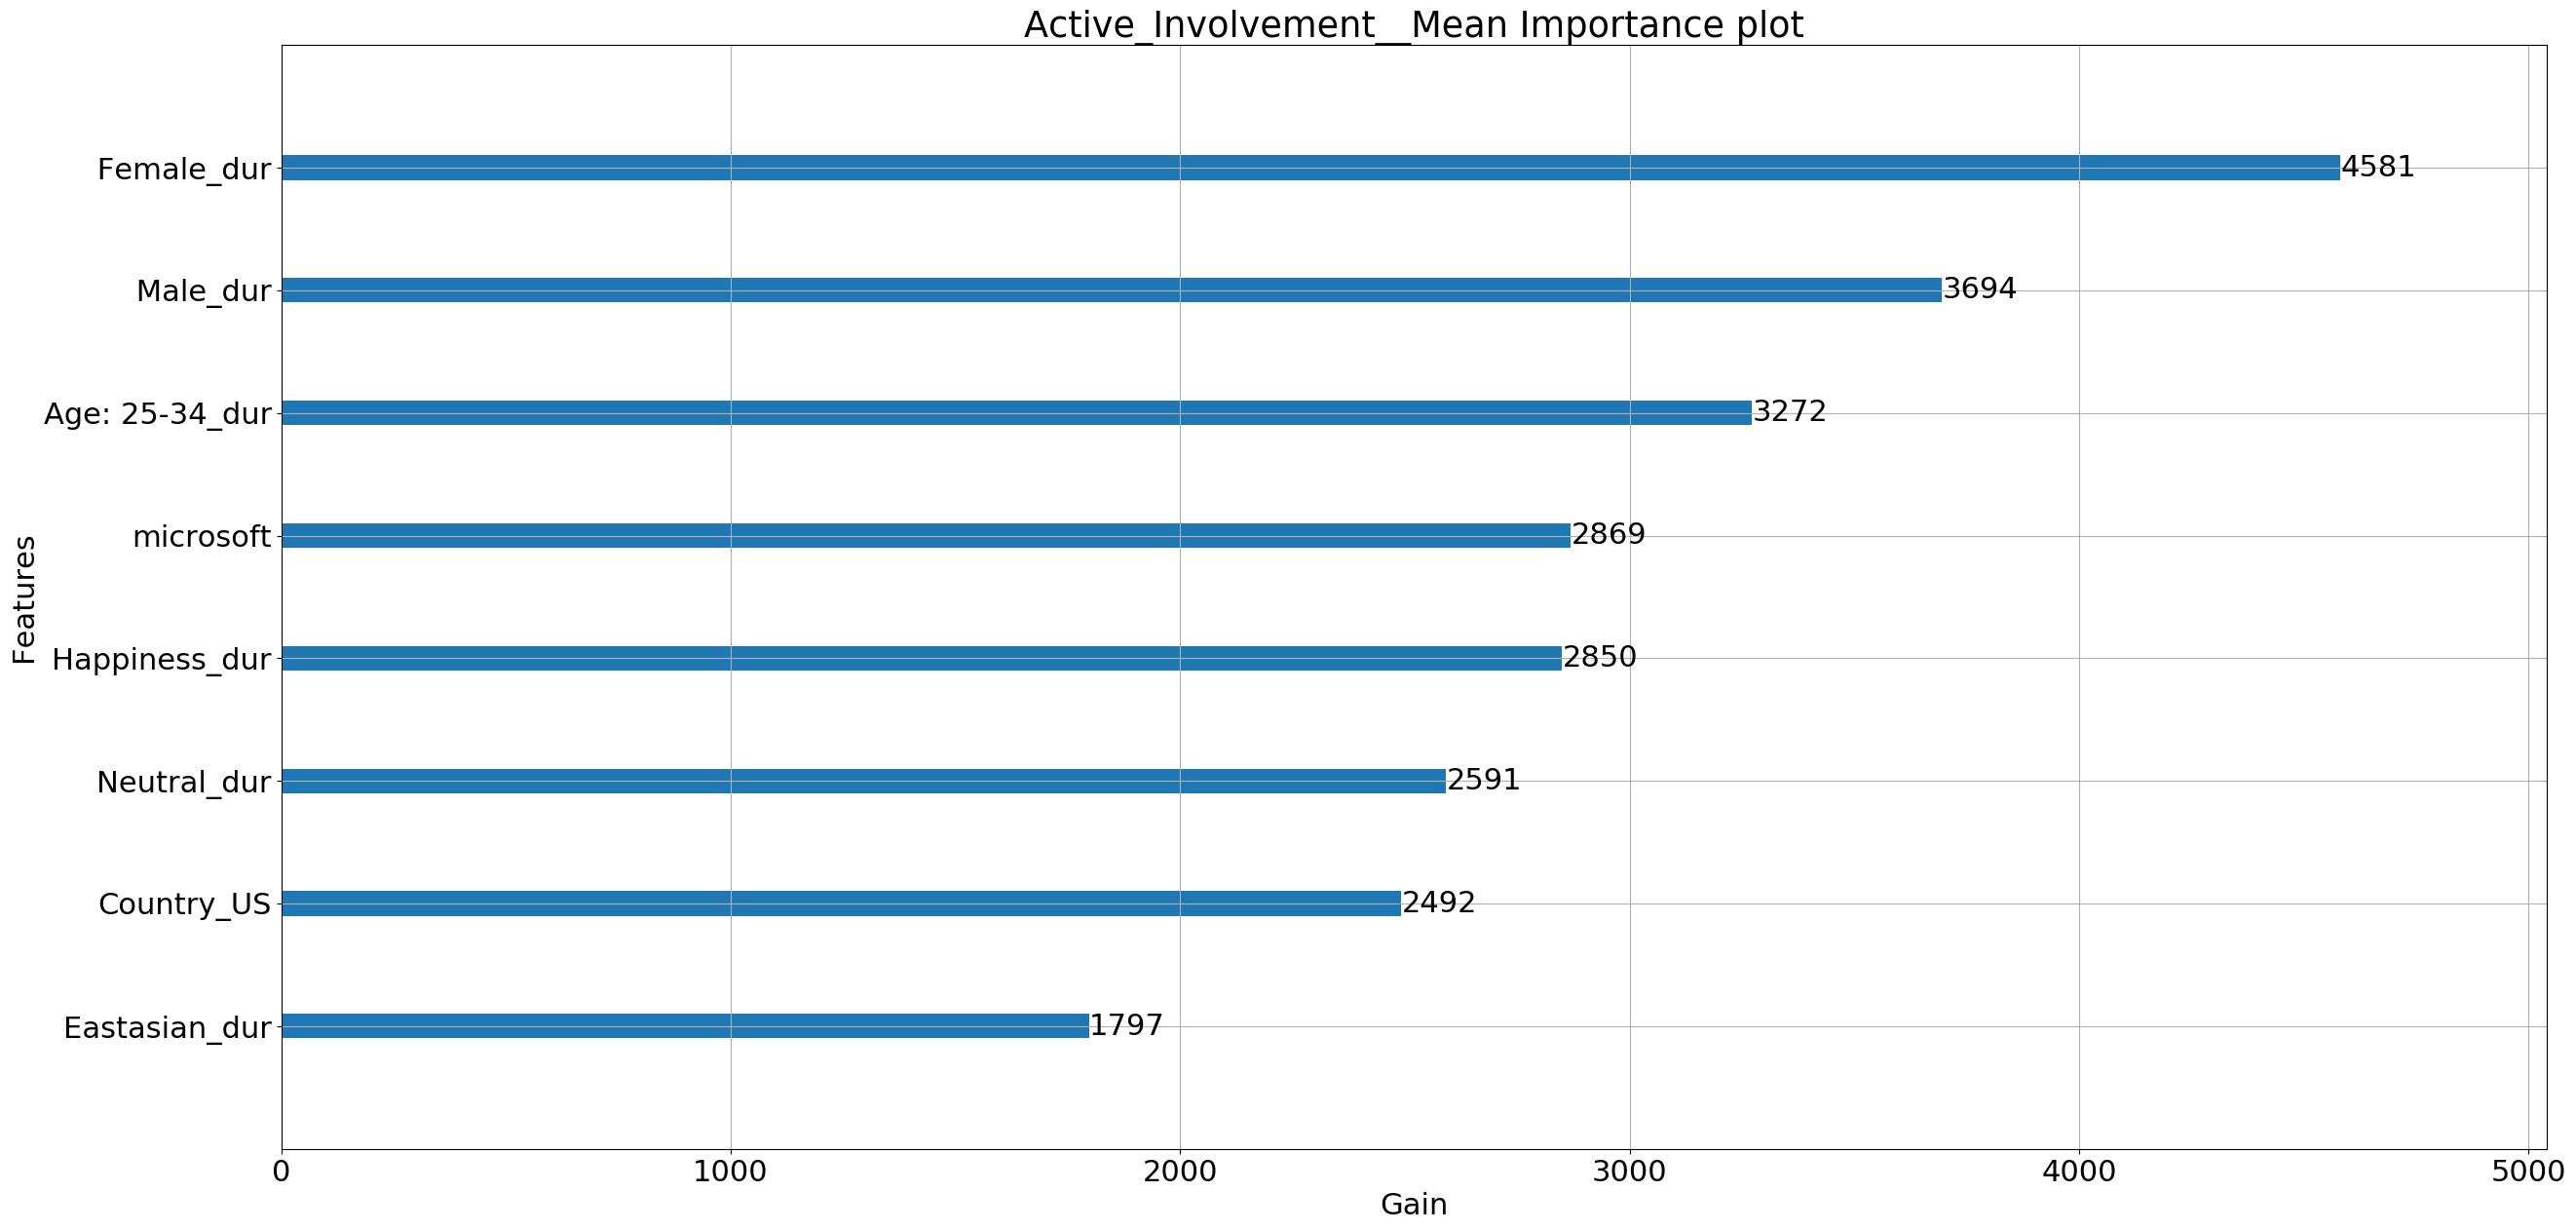

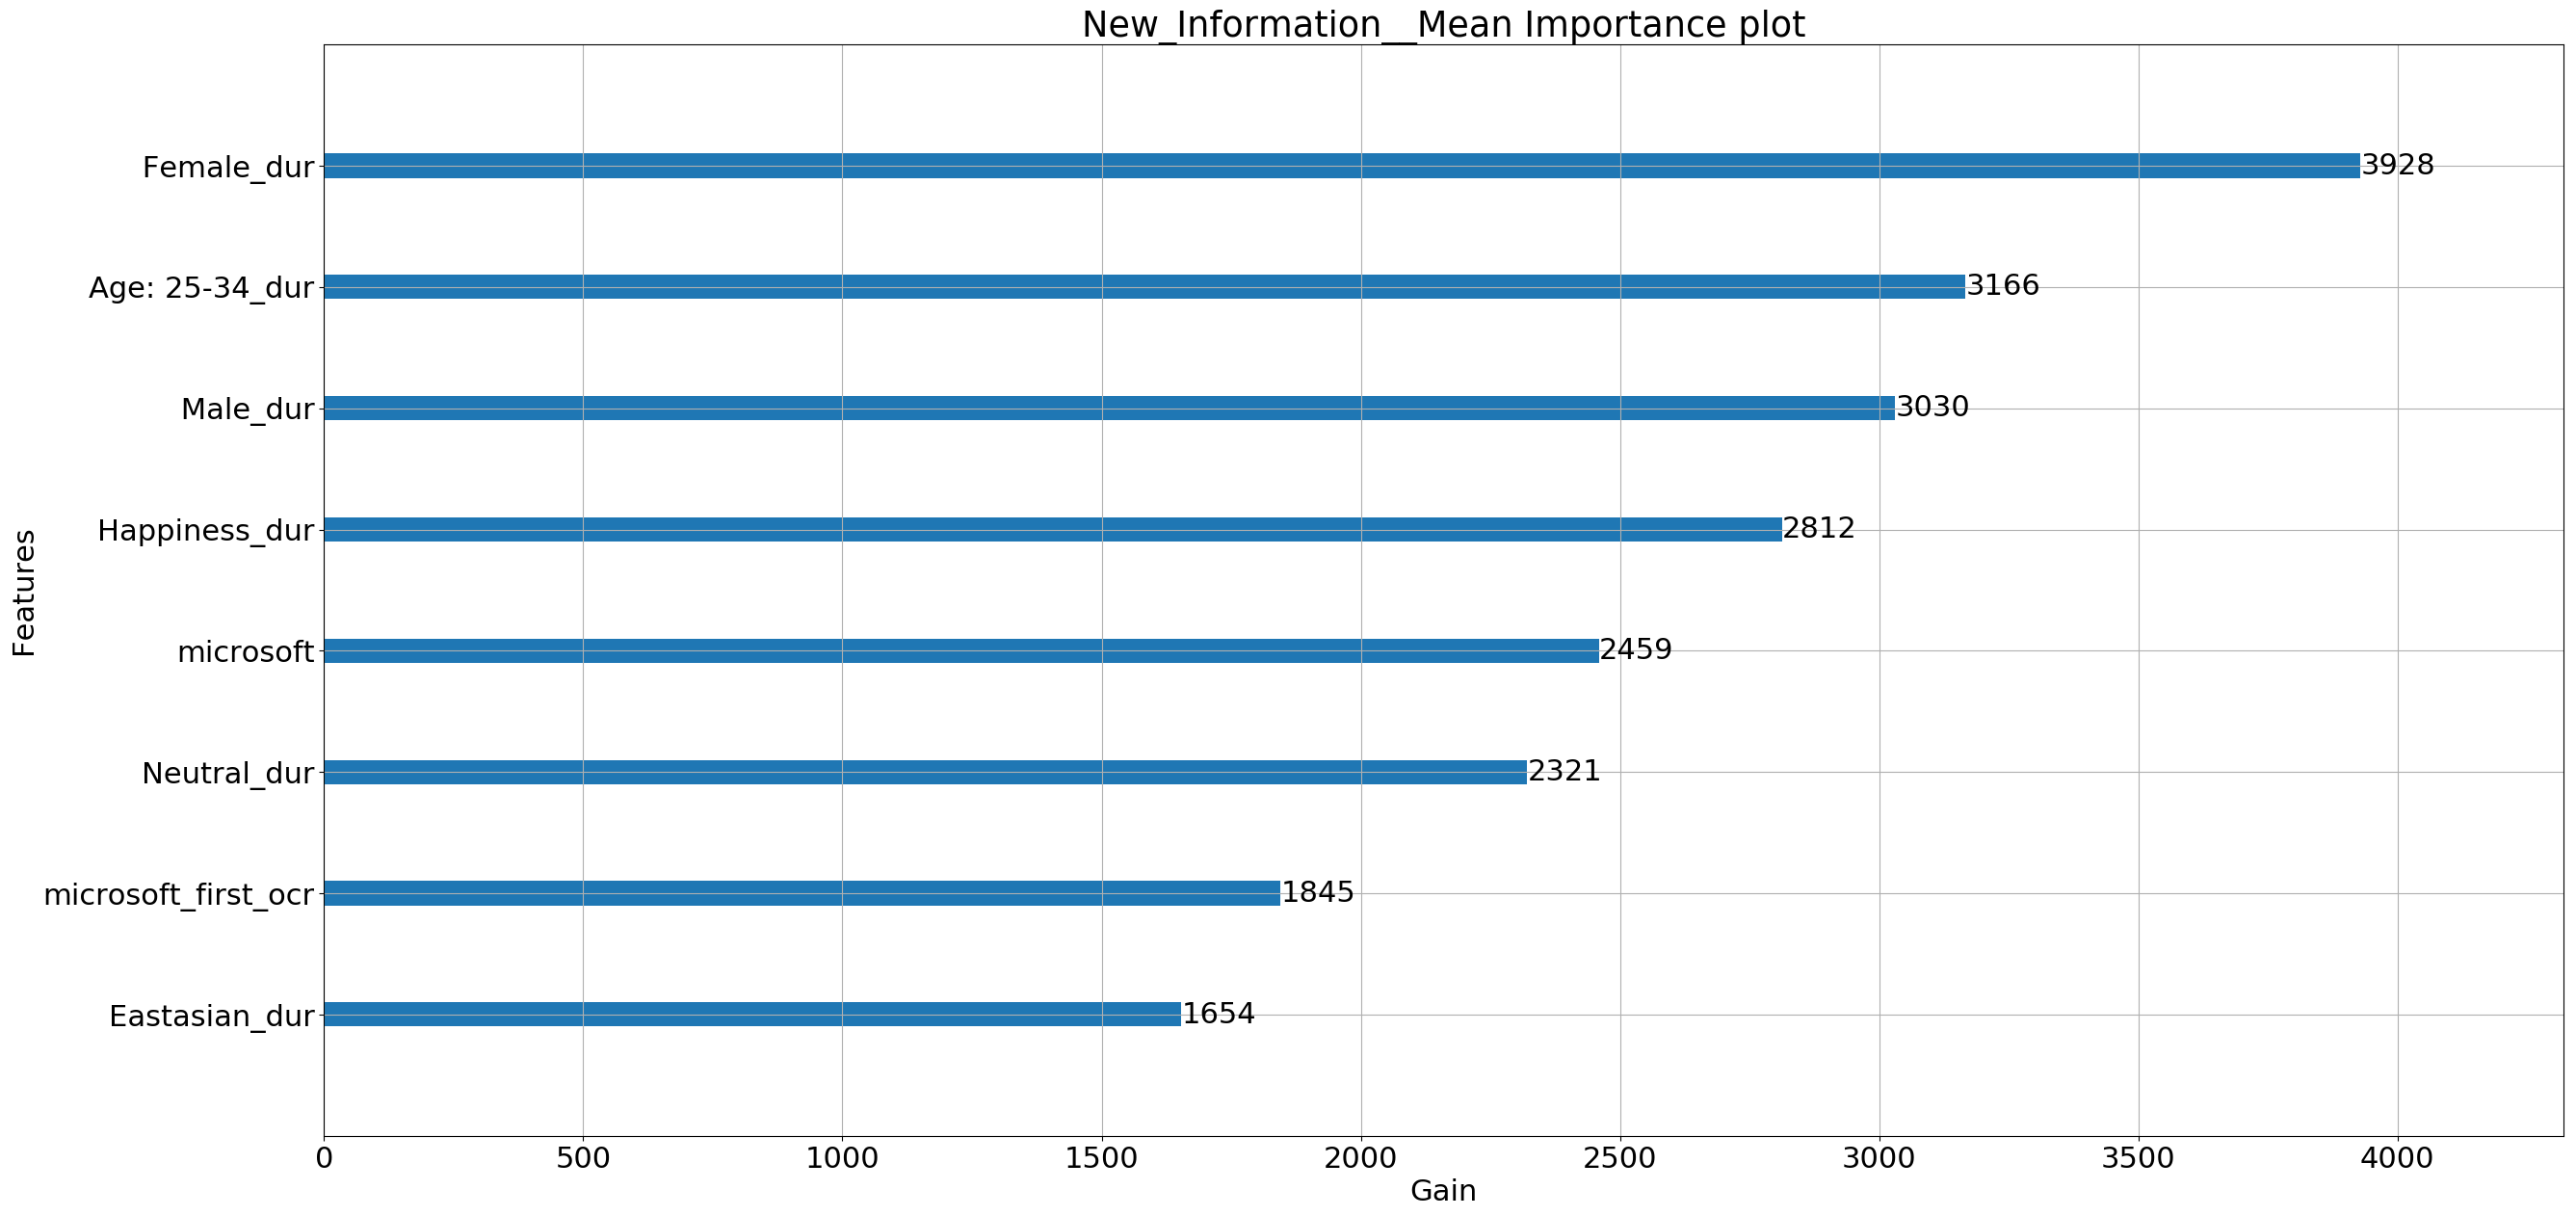

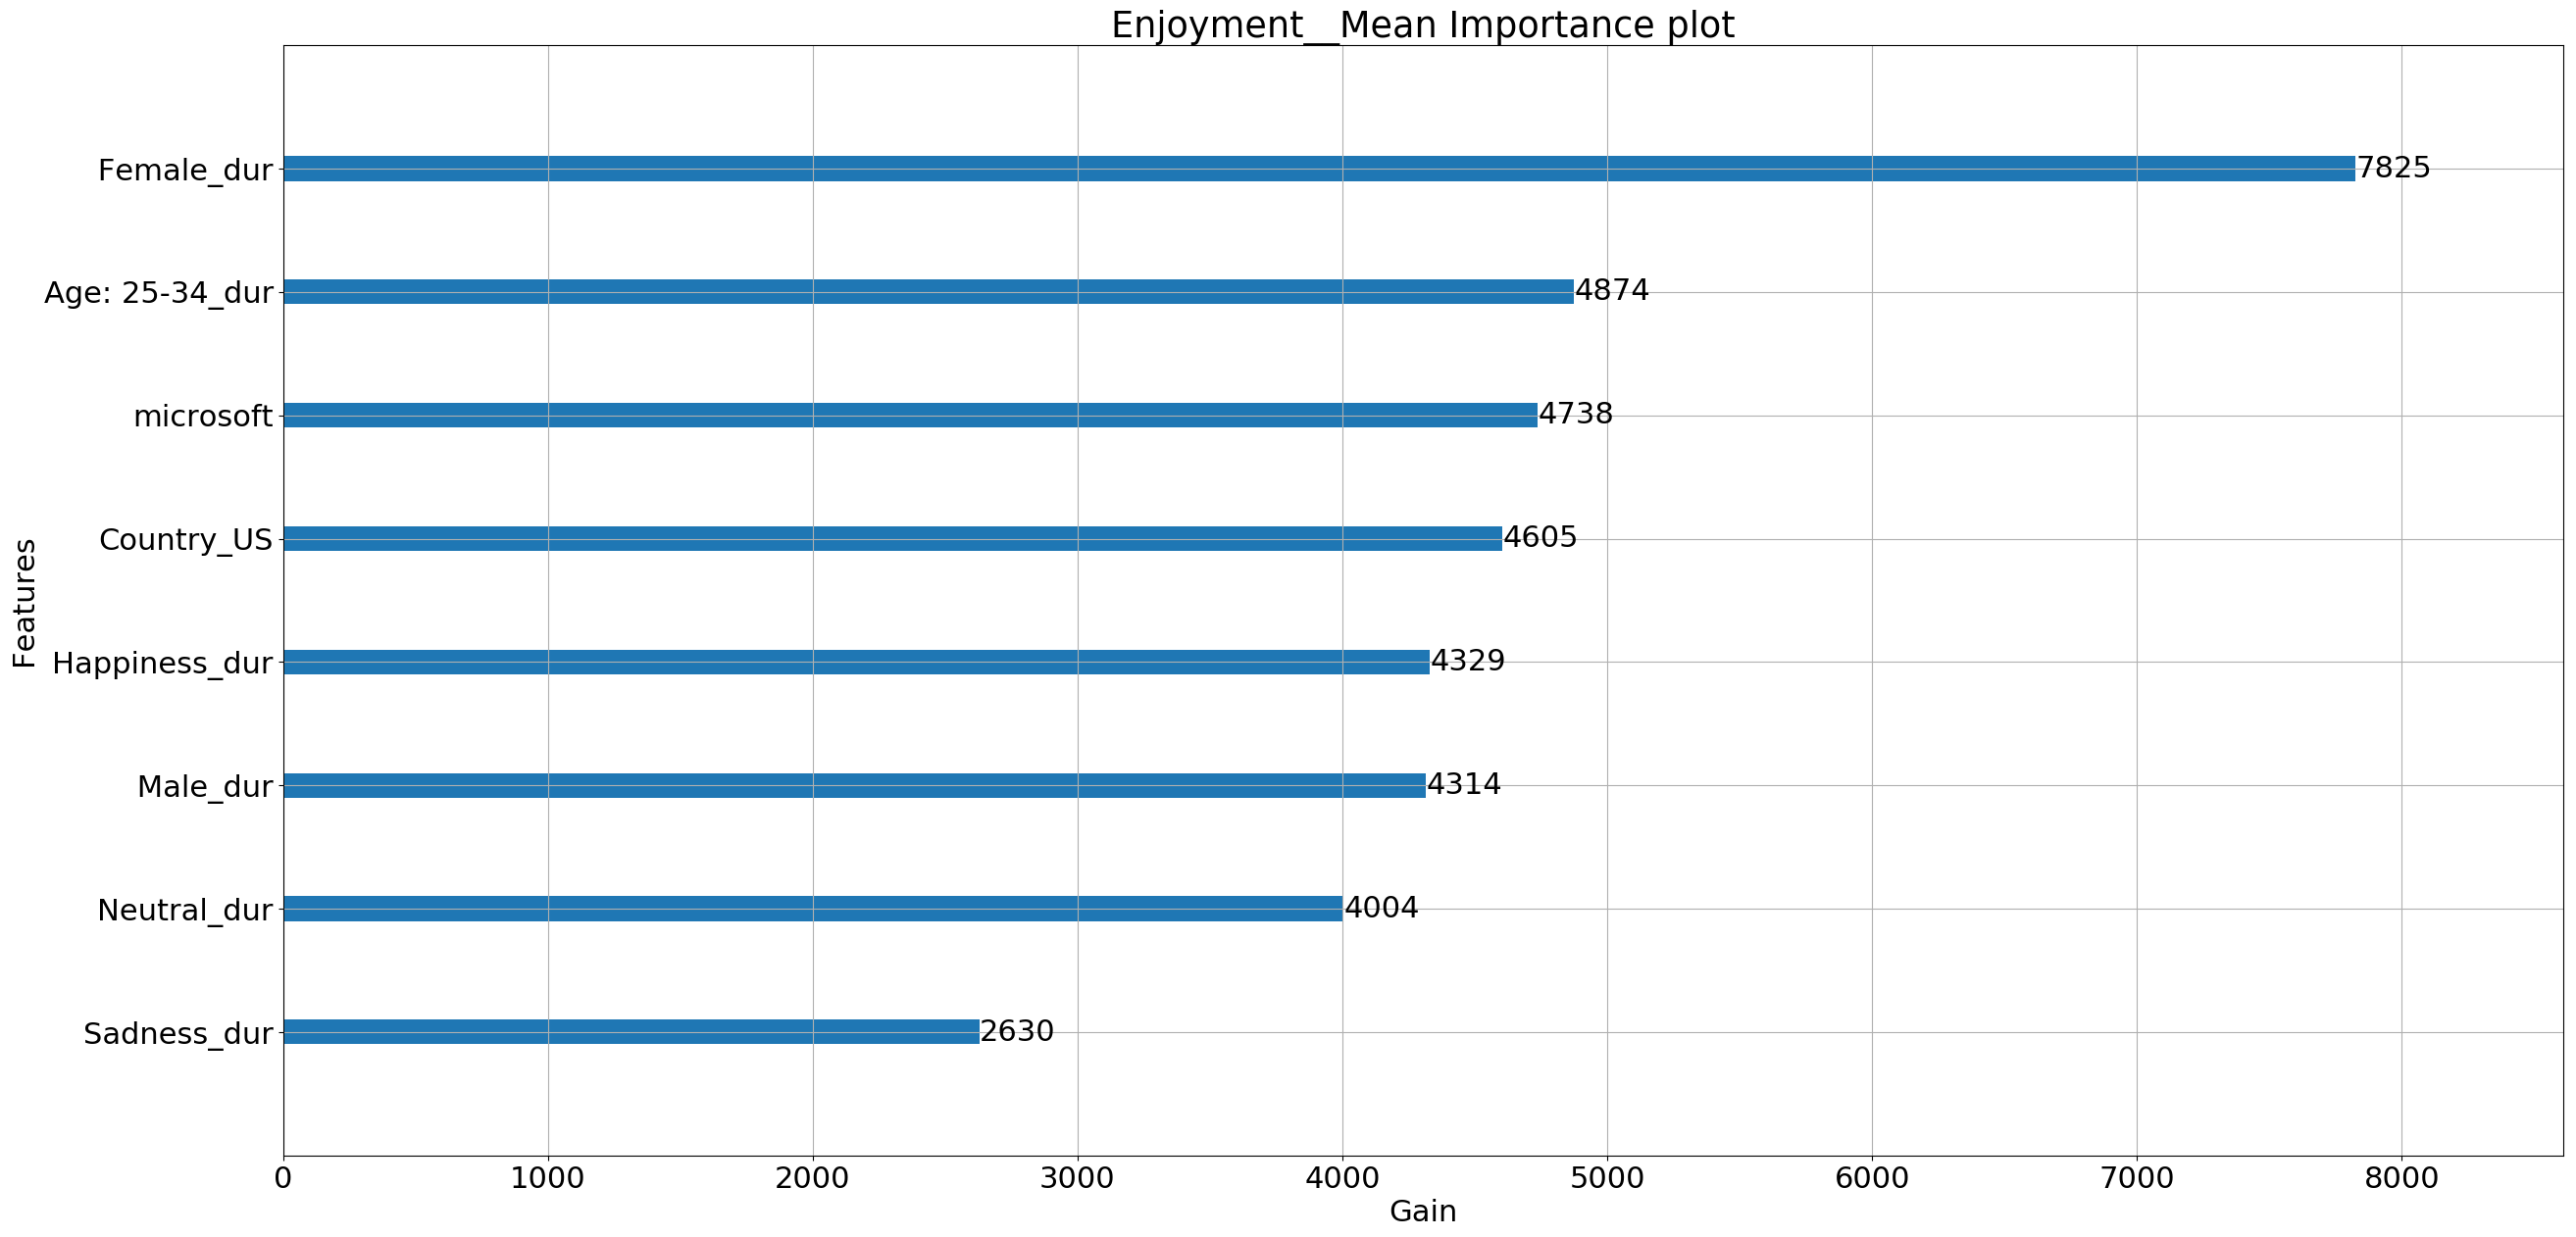

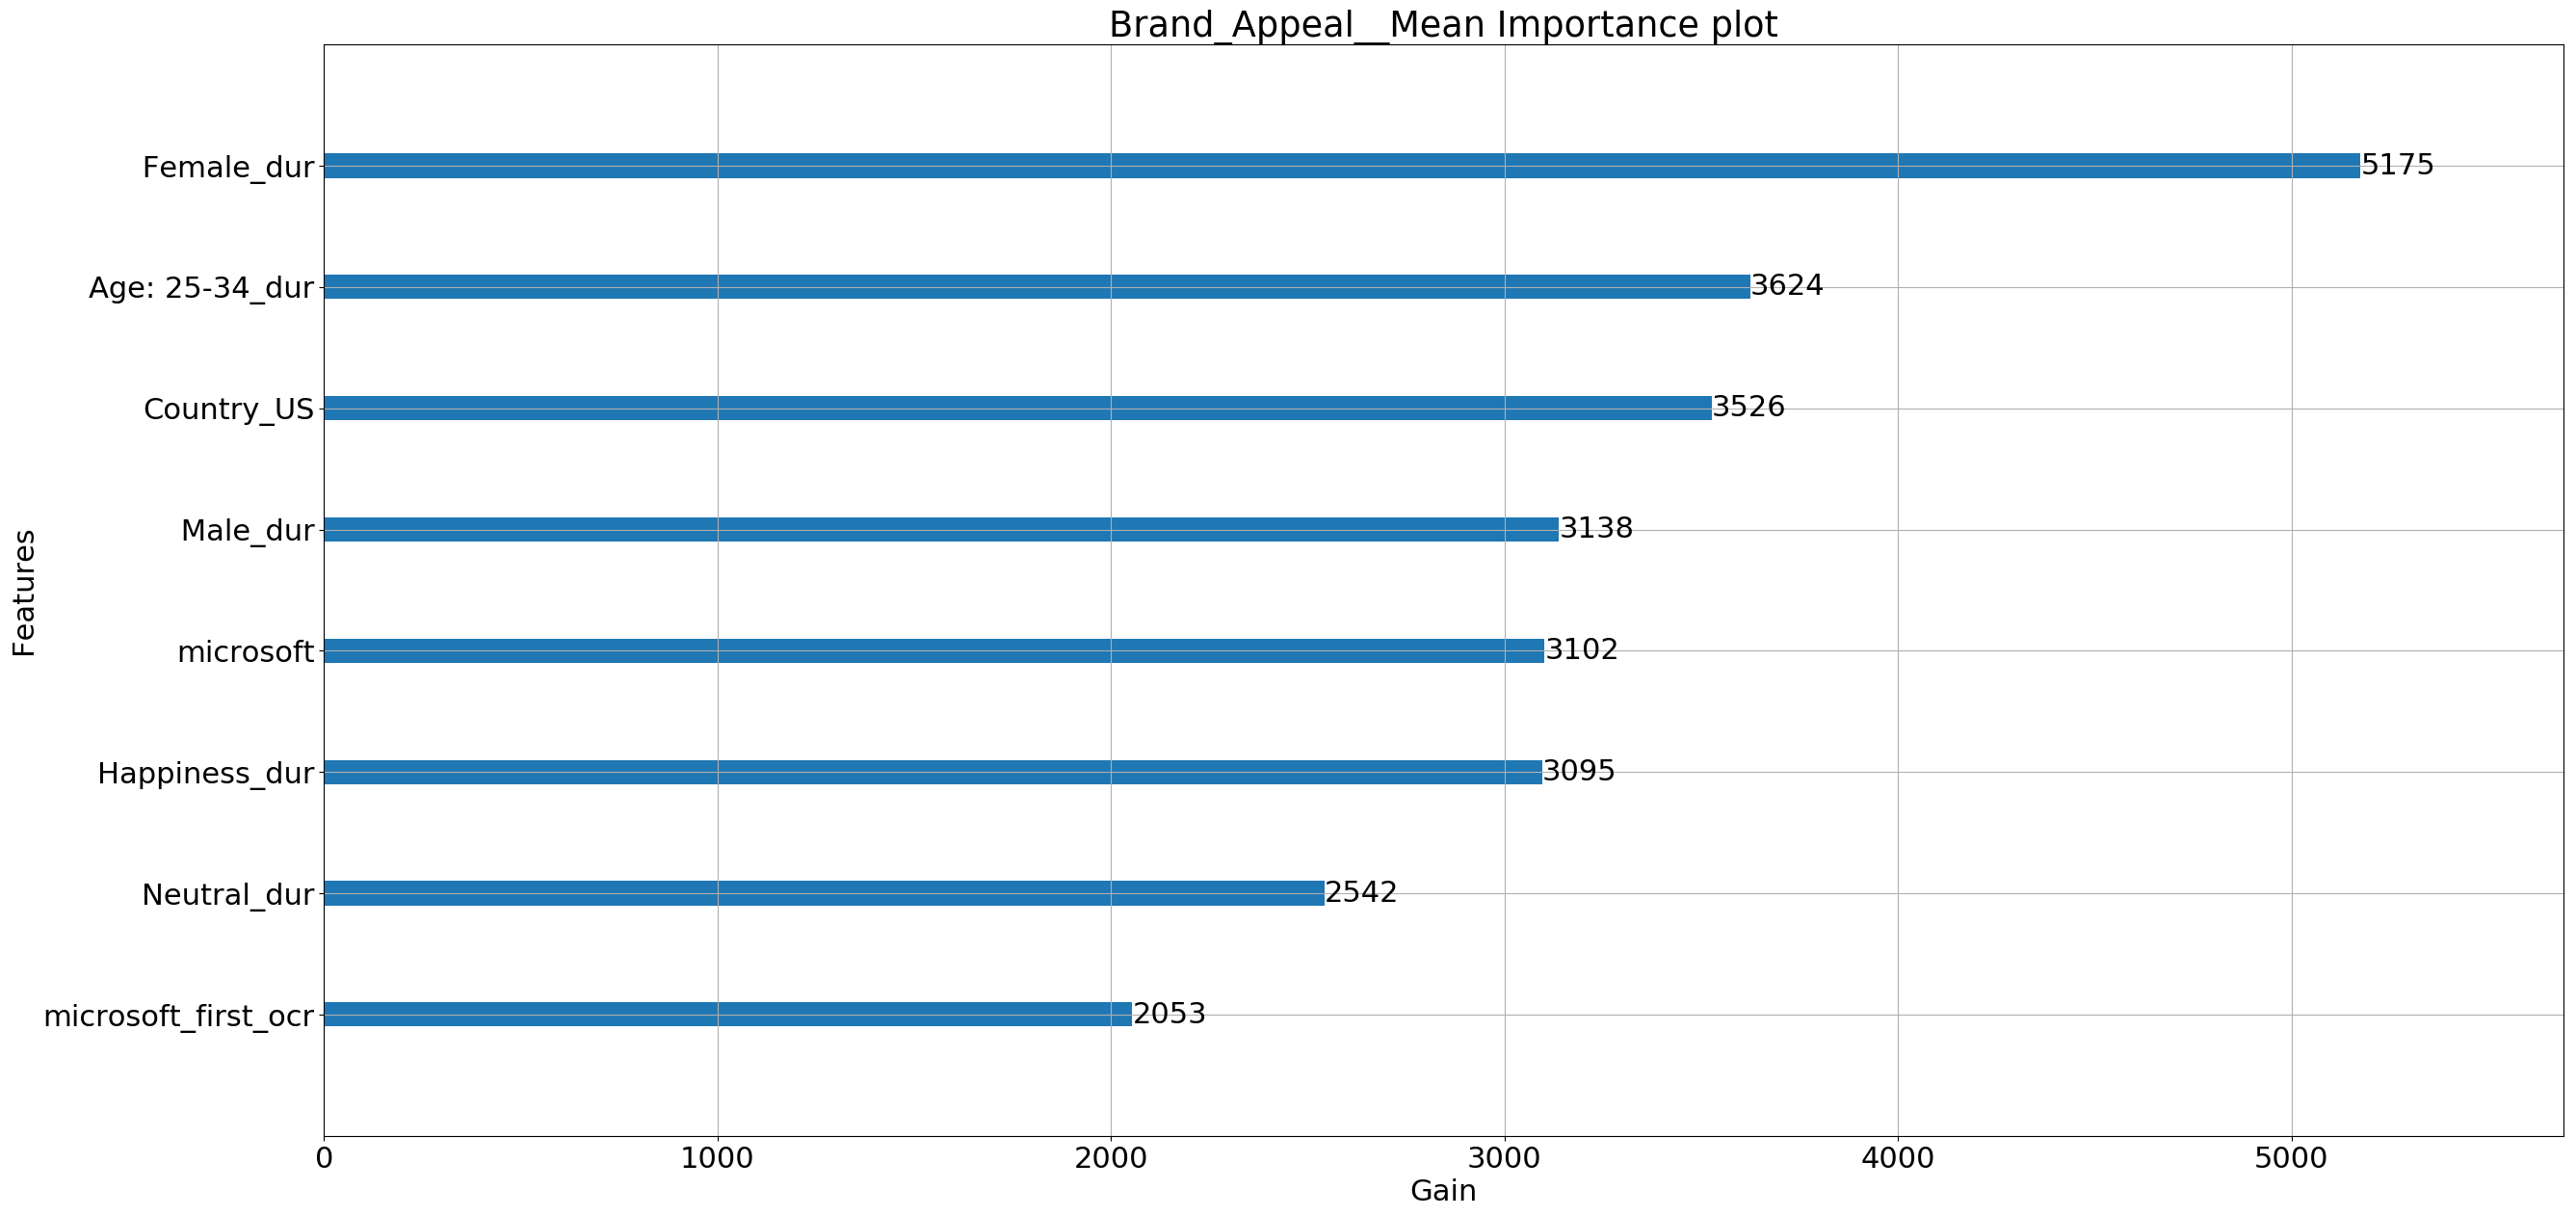

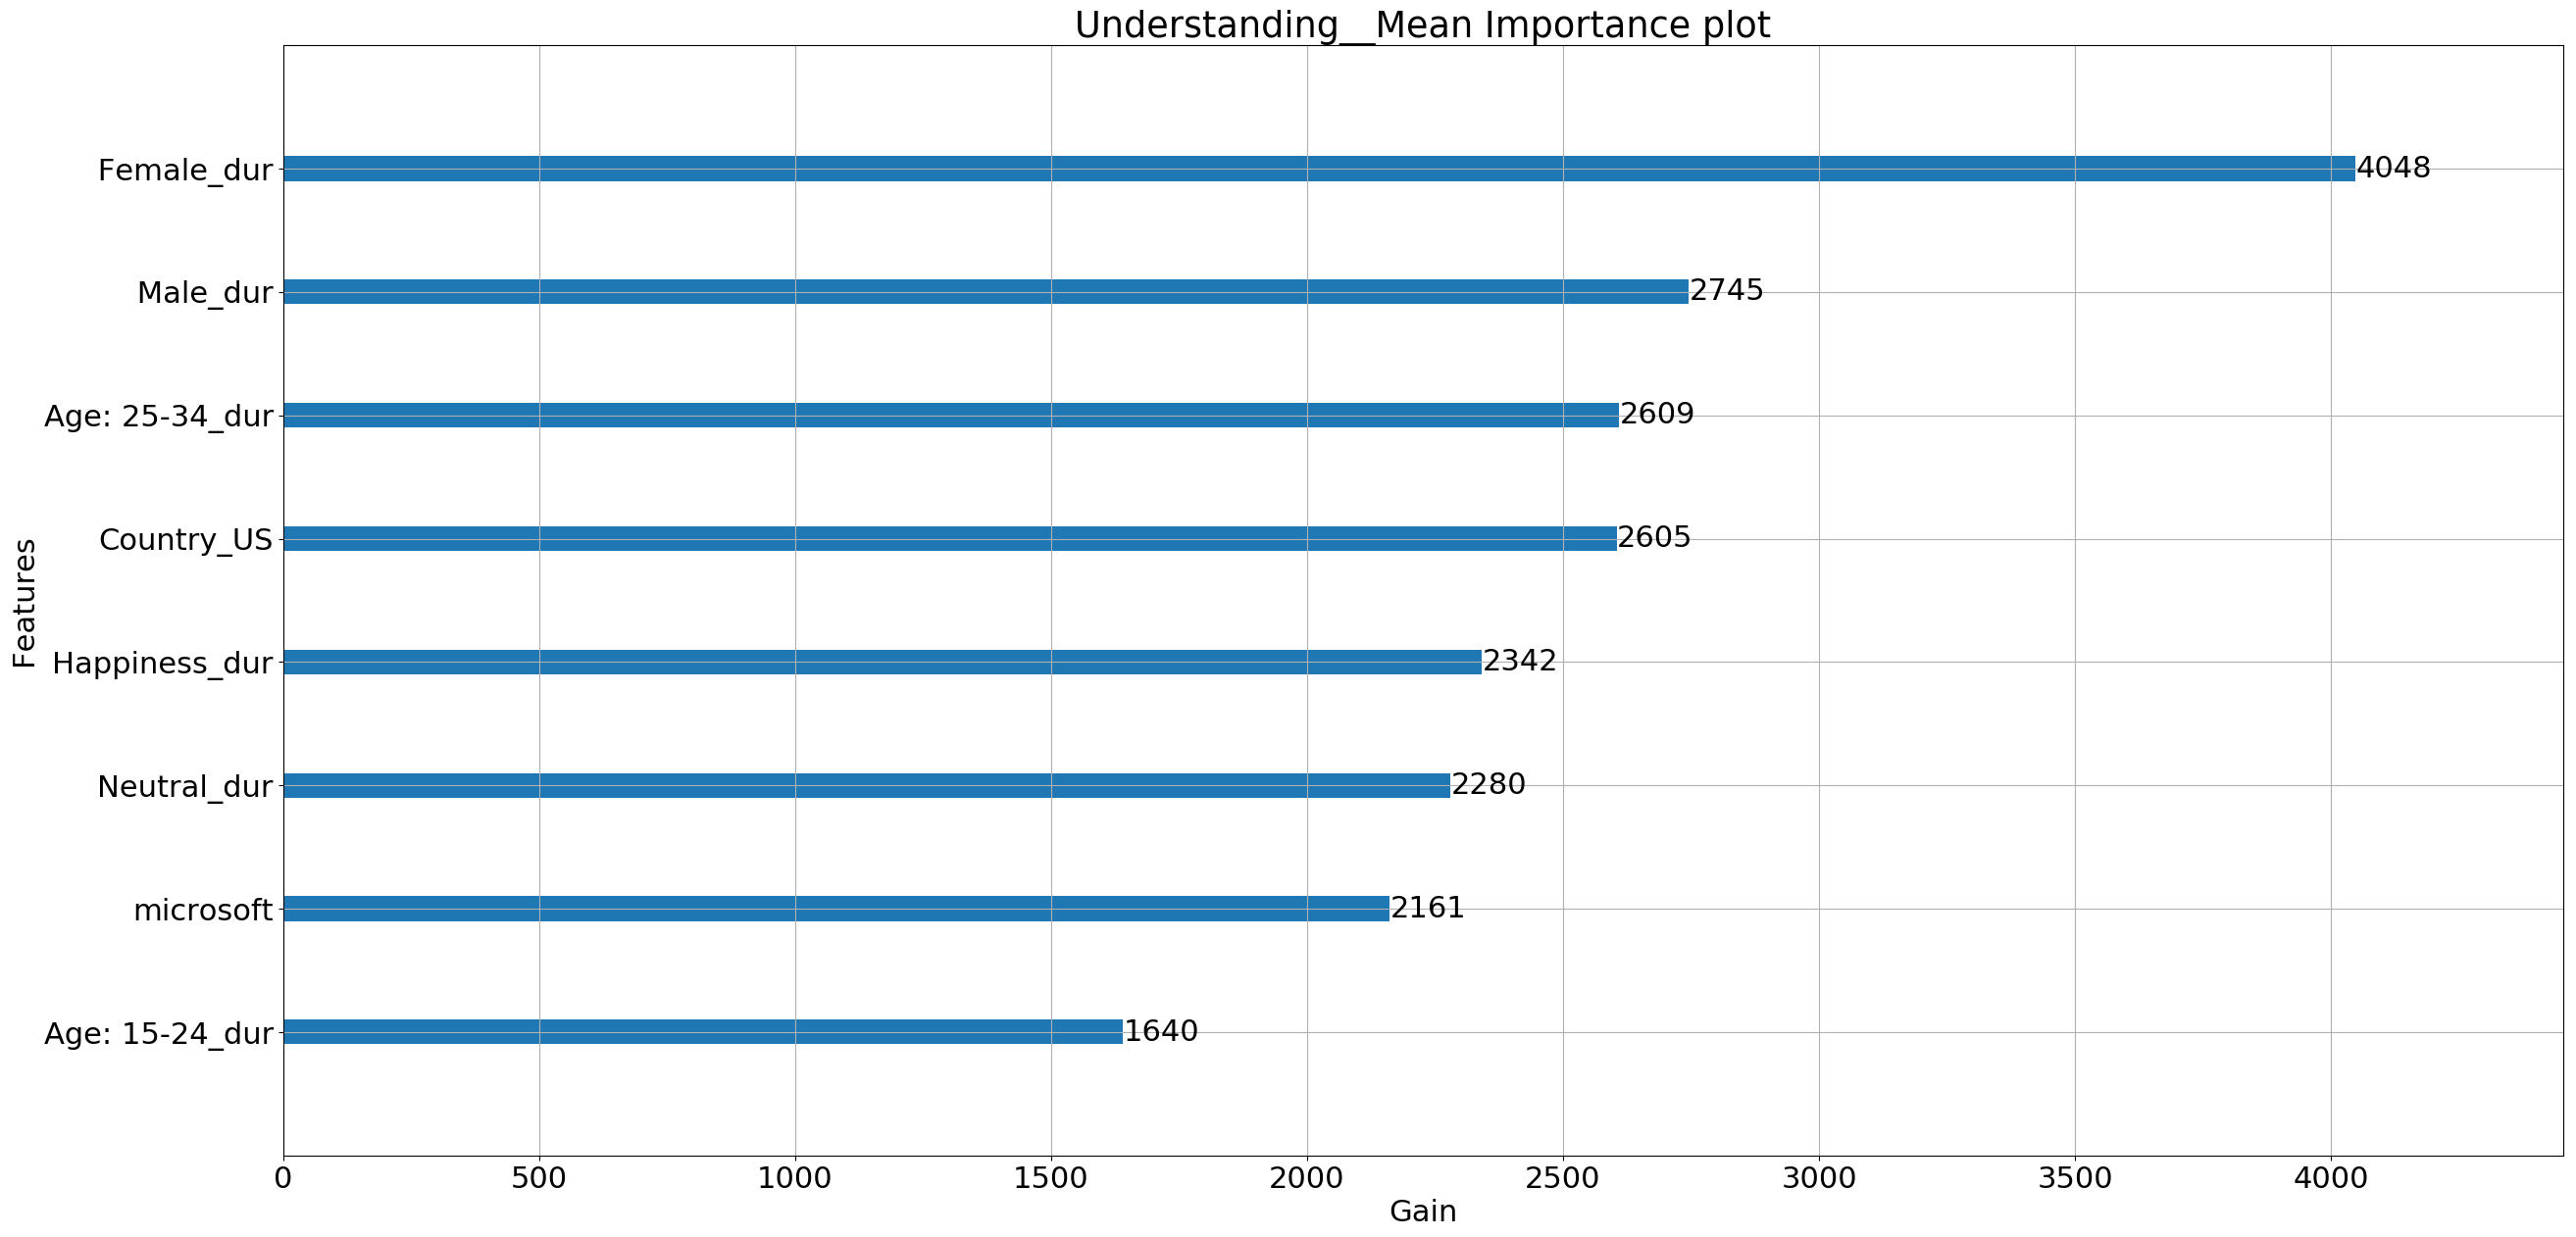

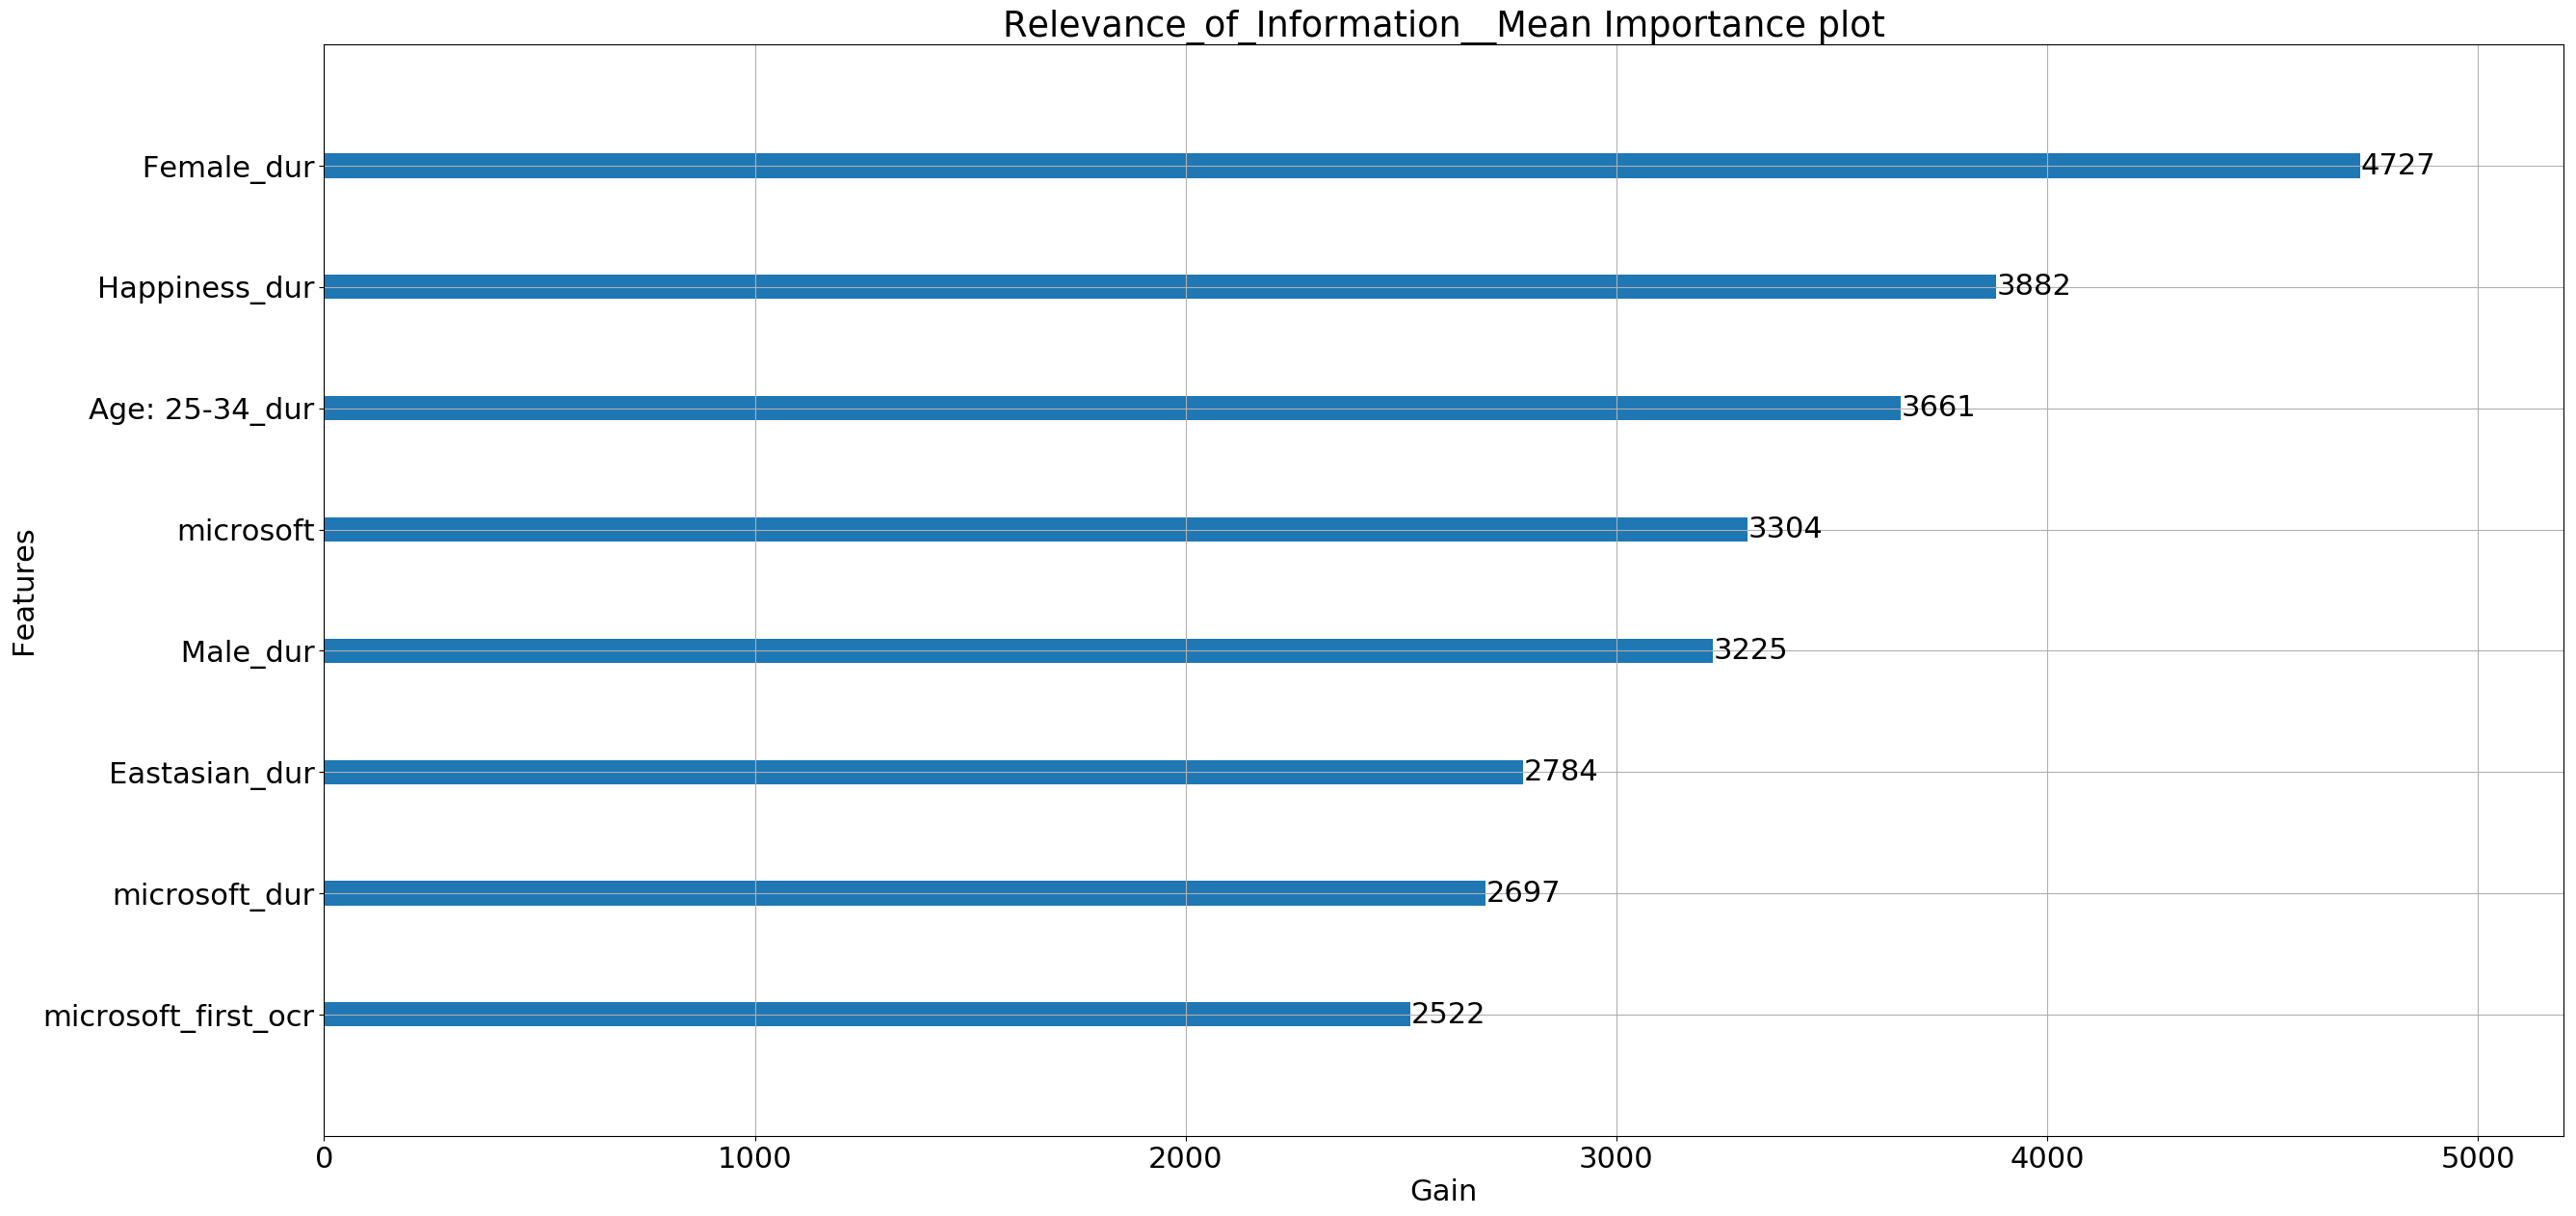

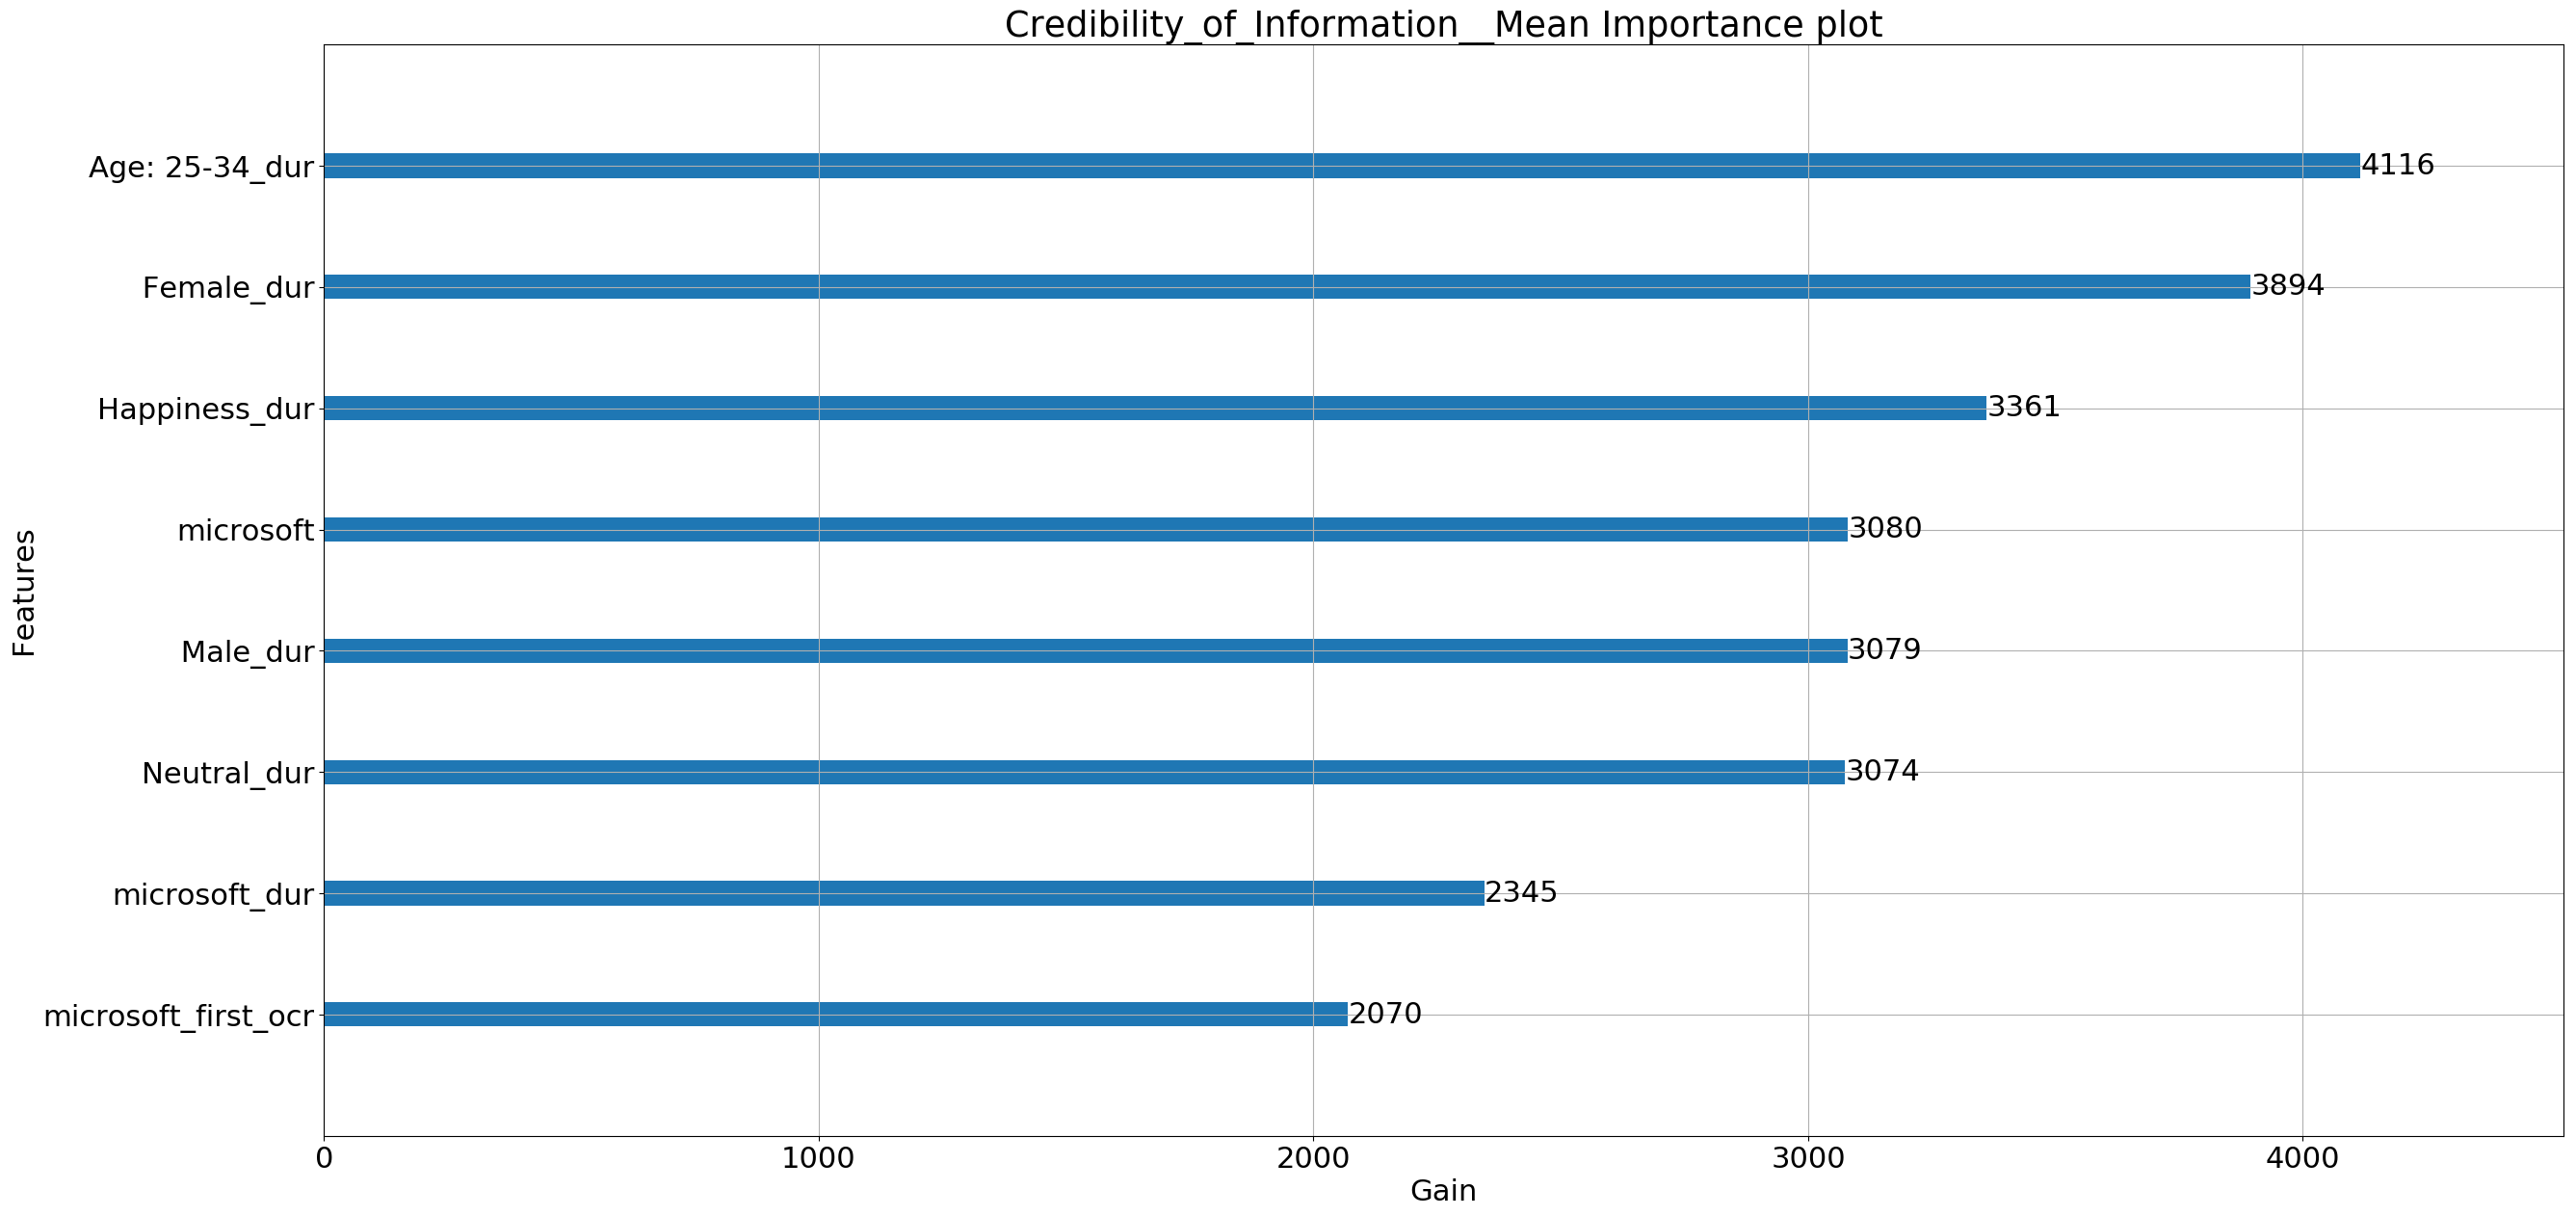

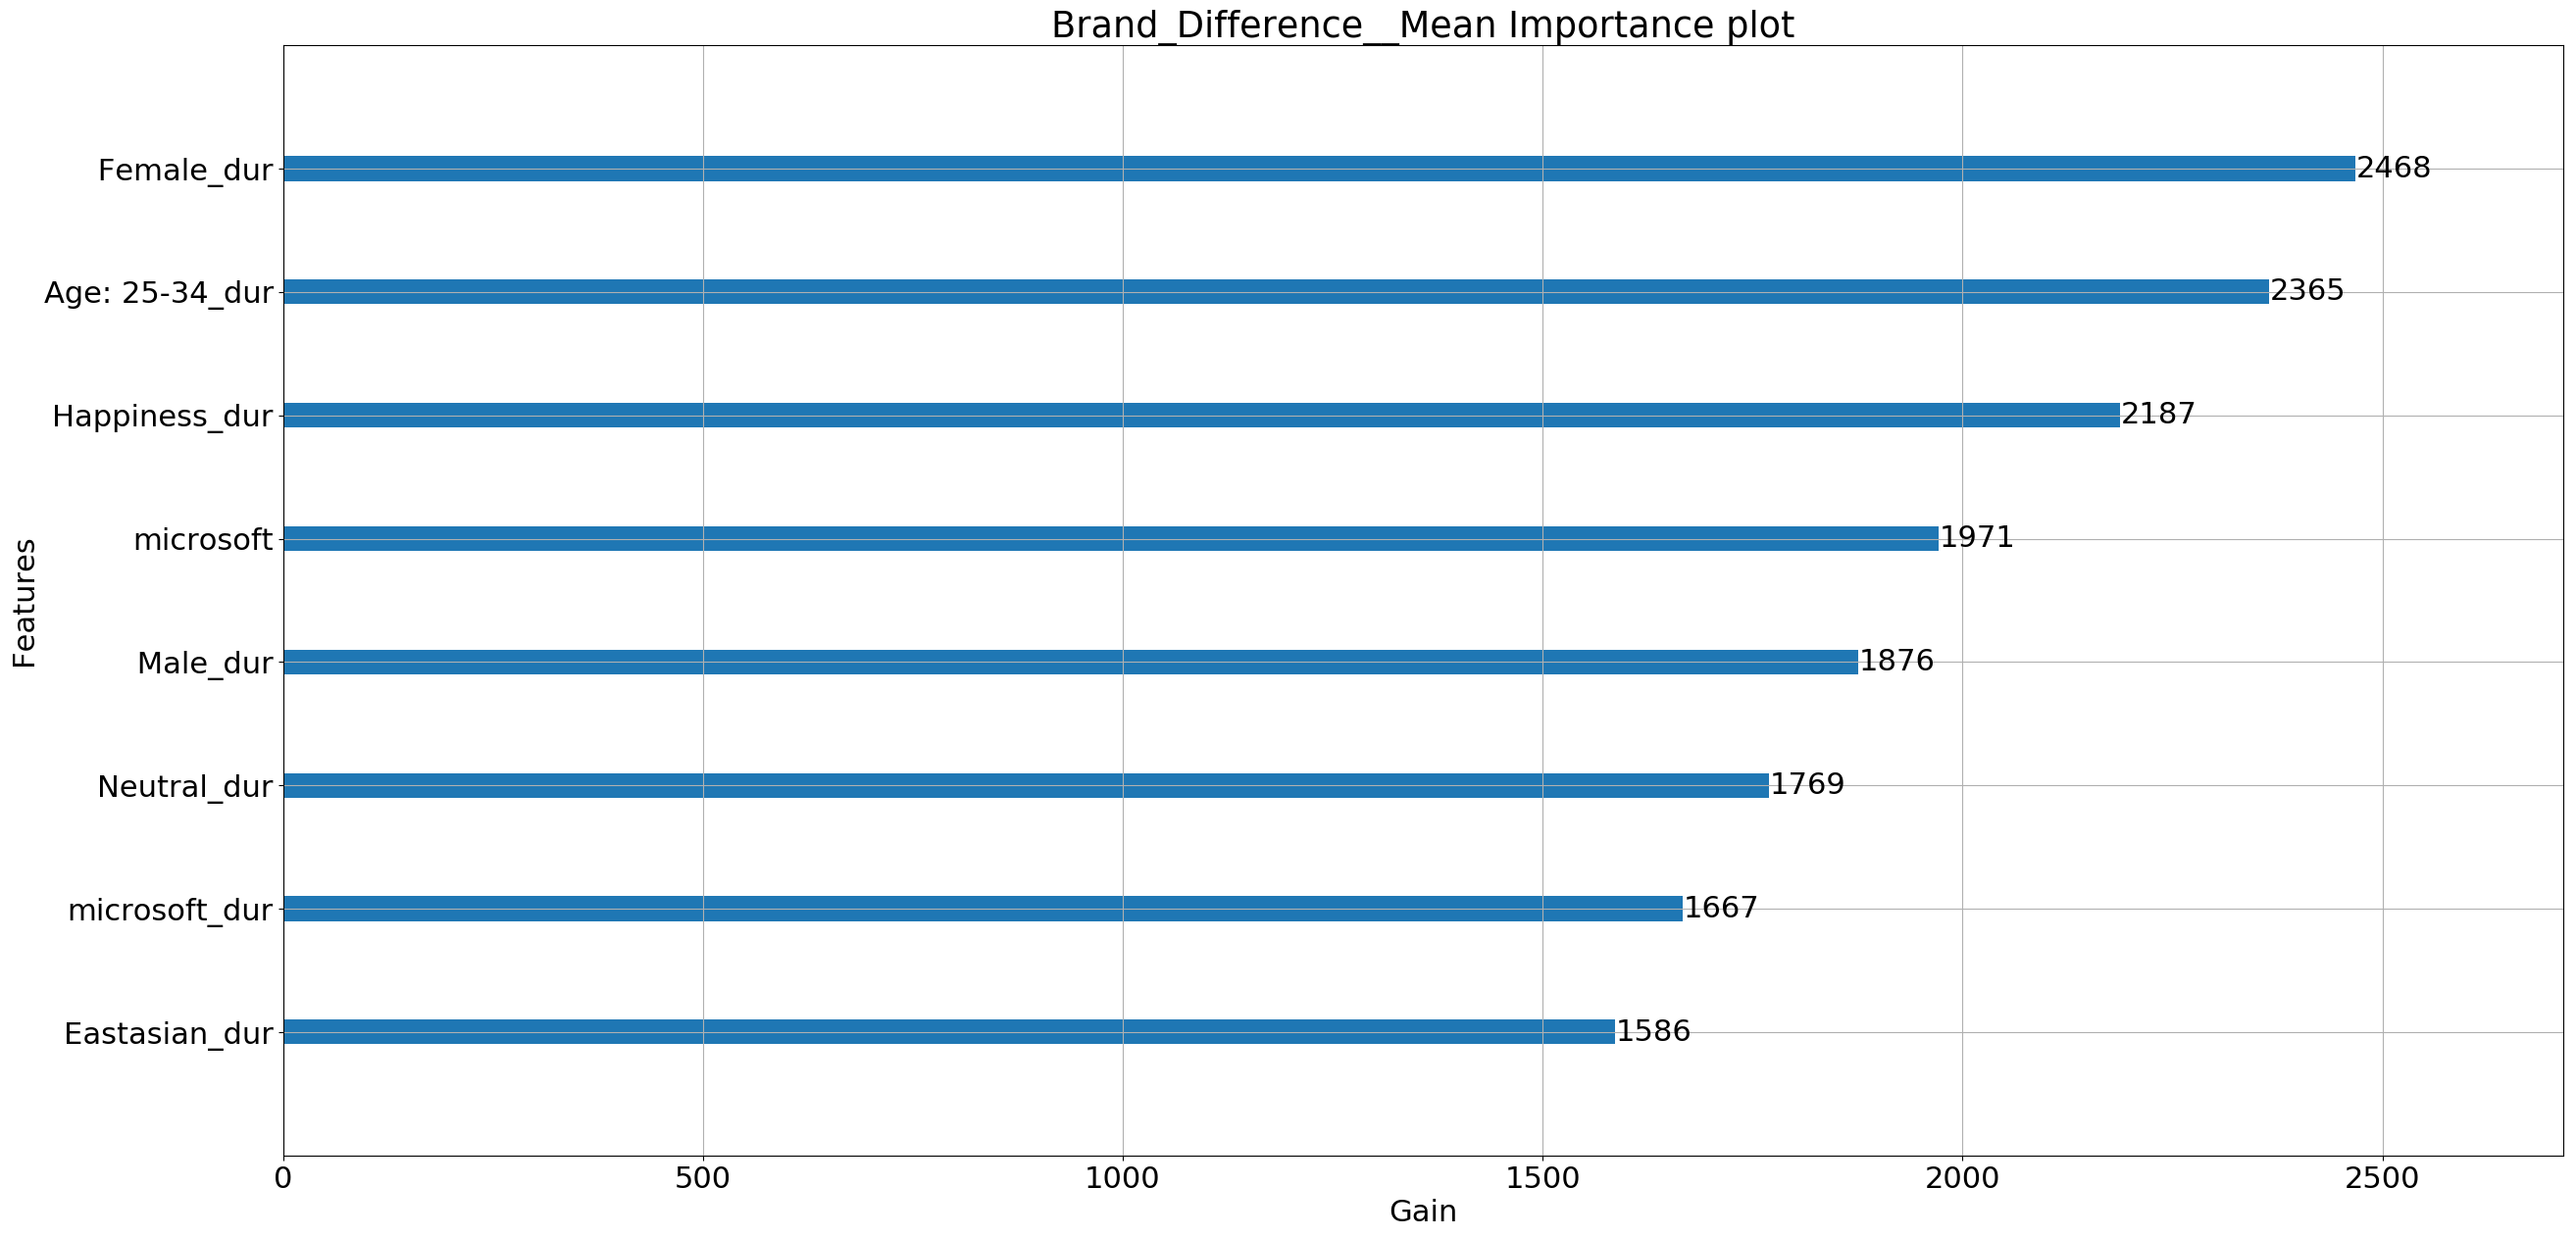

In [67]:
model.plot_feature_importance(models_xgb,10,y_test.columns,X_test.columns[1:],savefig=False)

In [58]:
# shap.initjs()
explainer_xgb=[]
shap_values_xgb=[]
for i in range(11):
    explainer_xgb.append(shap.TreeExplainer(models_xgb[i]))
    shap_values_xgb.append(explainer_xgb[-1].shap_values(X_train.drop('Video Name',1)))
    print(i)

0
1
2
3
4
5
6
7
8
9
10


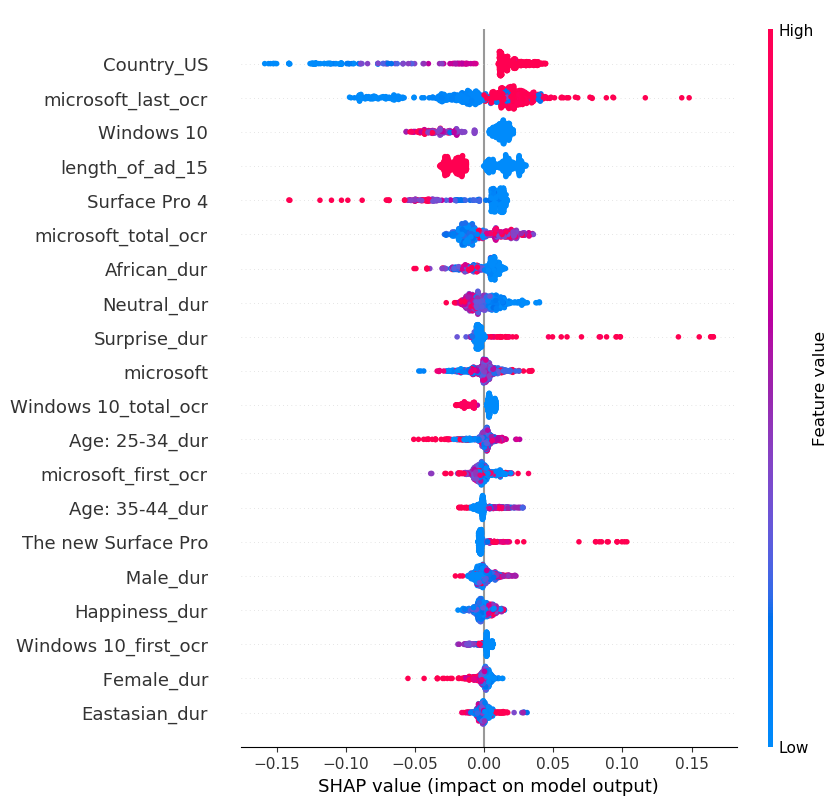

In [68]:
shap.summary_plot(shap_values_xgb[5],X_train.drop('Video Name',1))

In [86]:
model = Model('DT')

In [87]:
models_dt = model.train(X_train,y_train,X_test,y_test,metrics='r2',plot_error=False)

Unaided_Branding
For training set
r2_score: 0.896906
For test set
r2_score: 0.846676


Brand_Cues__Mean
For training set
r2_score: 0.730663
For test set
r2_score: 0.771979


Aided_Branding__Mean
For training set
r2_score: 0.684749
For test set
r2_score: 0.738840


Active_Involvement__Mean
For training set
r2_score: 0.697214
For test set
r2_score: 0.722361


New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

For training set
r2_score: 0.792915
For test set
r2_score: 0.824526


Enjoyment__Mean
For training set
r2_score: 0.682453
For test set
r2_score: 0.813248


Brand_Appeal__Mean
For training set
r2_score: 0.828664
For test set
r2_score: 0.838206


Understanding__Mean
For training set
r2_score: 0.745038
For test set
r2_score: 0.768115


Relevance_of_Information__Mean
For training set
r2_score: 0.700976
For test set
r2_score: 0.726074


Credibility_of_Information__Mean
For training set
r2_score: 0.725590
For test set
r2_score: 0.777988


Brand_Difference__Mean
For training set
r2_score: 0.794654
For test set
r2_score: 0.833419




[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [89]:
from sklearn import tree
import graphviz

In [90]:
dot_data = tree.export_graphviz(models_dt[0], out_file=None,
                                feature_names=X_train.drop('Video Name',1).columns.values,
                                class_names=y_train.columns.values,
                                filled=True, rounded=True,special_characters=True)

In [91]:
graph = graphviz.Source(dot_data)

In [92]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [930]:
import pickle

In [934]:
for i in range(11):
    filename = 'model'+str(i)+'.pkl'
    pickle.dump(models_rf[i],open(filename,'wb'))

In [933]:
models

[DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=0.2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=123, splitter='best')]

In [936]:
X.columns.values

array(['Video Name', 'Country_US', 'length_of_ad_15', 'ad_type_tv',
       ' Female_dur', ' Male_dur', 'Age: 0-15_dur', 'Age: 0-5_dur',
       'Age: 15-24_dur', 'Age: 25-34_dur', 'Age: 35-44_dur',
       'Age: 45-60_dur', 'Angry_dur', 'Disgust_dur', 'Fear_dur',
       'Happiness_dur', 'Neutral_dur', 'Sadness_dur', 'Surprise_dur',
       'African_dur', 'Caucasian_dur', 'Eastasian_dur', 'Latino_dur',
       'microsoft', 'microsoft_dur', 'microsoft_first_ocr',
       'microsoft_last_ocr', 'microsoft_total_ocr', 'ASUS T102',
       'Dell PCs', 'Dell XPS', 'Dell XPS 13', 'HP Spectre x360',
       'HP Spectre x360, Windows', 'Lenovo PCs', 'Lenovo Yoga 720',
       'Lenovo Yoga 910', 'MacBook Air', 'MacBook Pro', 'Macbook Air',
       'Microsoft Surface', 'Suface Laptop', 'Surface Book', 'Surface Go',
       'Surface Laptop', 'Surface Pen', 'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       

In [1116]:
features_ = ['microsoft_first_ocr',
'Lenovo Yoga 910_dur',
'Lenovo Yoga 910',
'Surface Pro 4_dur',
'Windows 10',
'ASUS T102_dur', 
' Female_dur',
'Windows 10_total_ocr',
' Male_dur',
'Lenovo Yoga 910',
'ASUS T102_dur',
'ASUS T102',
'Surface Pro 4',
'microsoft_first_ocr',
'microsoft_last_ocr',
'The new Surface Pro_dur', 
'The new Surface Pro',
' Male_dur',
'Age: 15-24_dur',
'microsoft_first_ocr',
' Male_dur',
'Age: 25-34_dur',
'ASUS T102_dur',
'Age: 25-34_dur',
' Male_dur', 
'The new Surface Pro_dur',
'microsoft_first_ocr',
'The new Surface Pro', 
'Surface Laptop',
'HP Spectre x360, Windows',
 'ASUS T102_dur',
'ASUS T102', 
'Neutral_dur',
'The new Surface Pro',
'Dell XPS 13',
 'HP Spectre x360, Windows_dur', 
'Happiness_dur',
'microsoft_total_ocr',
'microsoft_first_ocr',
'microsoft_last_ocr',
'The new Surface Pro_dur',
'Age: 25-34_dur',
'ASUS T102', 
'ASUS T102_dur',
'microsoft_first_ocr',
'Happiness_dur',
'Neutral_dur',
'microsoft_last_ocr',
'microsoft_last_ocr',
'length_of_ad_15',
 'microsoft_first_ocr', 
'The new Surface Pro_dur',
'The new Surface Pro', 
 'Caucasian_dur',
 'microsoft_dur',
'Happiness_dur',
'Windows 10_dur',
'microsoft_last_ocr',
'length_of_ad_15',
'Windows 10',
'Happiness_dur',
'The new Surface Pro', 
'microsoft',
'Caucasian_dur',
'microsoft_last_ocr', 
 'Windows 10', 
'Windows 10_dur',
'length_of_ad_15', 
 'African_dur',
'microsoft_first_ocr', 
'Age: 35-44_dur',
'Age: 25-34_dur',
'Windows 10_first_ocr',
'Windows 10_total_ocr',
'microsoft_last_ocr' ,
'Age: 25-34_dur',
"African_dur",
'Windows 10',
'Surface Pro 4',
'Windows 10_first_ocr',
'length_of_ad_15',
'microsoft_last_ocr', 
'Country_US', 
'length_of_ad_15', 
'Windows 10',
 'Windows 10_dur',
'Surface Pro 4_dur',
 'Surface Pro 4',
'African_dur',
'Country_US',
'microsoft_last_ocr', 
'length_of_ad_15', 
'Windows 10',
'Surface Pro 4',
'microsoft_total_ocr',
'African_dur',
'Neutral_dur',
'Windows 10_dur','Country_US','microsoft_last_ocr', 'Windows 10_dur','microsoft_last_ocr', 
 'Windows 10','Surface Go','Country_US','Country_US','length_of_ad_15', 
 'microsoft_first_ocr',' Male_dur','microsoft_first_ocr','Windows 10','Windows 10_dur',
 'microsoft_last_ocr','Surface Go_dur','microsoft_total_ocr','Surface Go_dur','Windows 10', 
'length_of_ad_15','Latino_dur','Eastasian_dur','Surface Go','microsoft_first_ocr',
'African_dur','microsoft_dur','Surface Go','Windows 10, Windows','Age: 25-34_dur',
'Country_US',' Female_dur','ASUS T102','microsoft_total_ocr','African_dur',
'Windows 10_last_ocr','Caucasian_dur','African_dur','The new Surface Pro','Windows 10_first_ocr',
'Windows 10_first_ocr','microsoft_dur','Windows 10_total_ocr',
'length_of_ad_15',' Female_dur','microsoft_first_ocr',' Female_dur','Age: 25-34_dur',
'Country_US','Country_US','length_of_ad_15','Surface Go','Windows 10',
'African_dur',' Male_dur','Country_US','Country_US','length_of_ad_15',
'Windows 10','Age: 25-34_dur','microsoft','Windows 10_first_ocr','Country_US',
'microsoft_last_ocr','microsoft','African_dur','microsoft_last_ocr','microsoft_last_ocr', 
'microsoft_first_ocr','Caucasian_dur','Windows 10','microsoft','Happiness_dur',
'Neutral_dur','Neutral_dur','microsoft_dur','Neutral_dur','Windows 10_first_ocr',
'Latino_dur','microsoft_last_ocr','Windows 10','Surface Laptop'
]

In [1117]:
feature_df = pd.DataFrame(features_,columns=['Important Feature'])

In [1118]:
duplicates_removed = feature_df.drop_duplicates()

In [1119]:
cnt_df = pd.DataFrame(columns=[target_col])

In [1120]:
target_col =['Feature']
dict_ = {'Feature':['test']}
for col in y_train.columns.values:
    target_col.append(col)
    dict_[col] = [0]

In [979]:
for col in target_col[1:]:
    X[col] = Y[col]

In [1042]:
dict_

{'Feature': ['test', 'test2'],
 'Unaided_Branding': [0],
 'Brand_Cues__Mean': [0],
 'Aided_Branding__Mean': [0],
 'Active_Involvement__Mean': [0],
 'New_Information__Mean': [0],
 'Enjoyment__Mean': [0],
 'Brand_Appeal__Mean': [0],
 'Understanding__Mean': [0],
 'Relevance_of_Information__Mean': [0],
 'Credibility_of_Information__Mean': [0],
 'Brand_Difference__Mean': [0]}

In [1121]:
for i,col in enumerate(duplicates_removed.values):
    print(i)
    Y = X[X[col[0]].isna()==False]
    dict_['Feature'].append(col[0])
    for target in target_col[1:]:
        Z = (Y[target].isna()== False).sum()
#         print(Z)
        dict_[target].append(Z)
#         print(dict_)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [1123]:
cnt_df =pd.DataFrame(dict_)

In [1125]:
cnt_df = cnt_df.iloc[1:,:]

In [1126]:
cnt_df.to_excel(cnt_df)

TypeError: to_excel() missing 1 required positional argument: 'excel_writer'

In [1002]:
duplicates_removed.values[0]

array(['microsoft_first_ocr'], dtype=object)

In [ ]:
explainer_xgb=[]
shap_values_xgb=[]
for i in range(11):
    explainer_xgb.append(shap.TreeExplainer(models[i]))
    shap_values_xgb.append(explainer_xgb[-1].shap_values(X_train.drop('Video Name',1)))
    print(i)